In [1]:
import os
import re
import json
import pickle
from pathlib import Path
import yaml
from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scanpy as sc
import scipy
import skimage
import pandas as pd
import torch
import tifffile
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram
from einops import rearrange, repeat

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import mushroom.utils as utils
import mushroom.visualization.utils as vis_utils
import mushroom.data.datasets as datasets
import mushroom.data.visium as visium
import mushroom.data.xenium as xenium
import mushroom.data.multiplex as multiplex
import mushroom.data.he as he
import mushroom.registration.bigwarp as bigwarp
from mushroom.mushroom import Mushroom, DEFAULT_CONFIG

In [6]:
project_dir = '/data/estorrs/mushroom/data/projects/submission_v1'
output_dir = os.path.join(project_dir, 'analysis', 'dataset_summary')
Path(output_dir).mkdir(parents=True, exist_ok=True)

In [7]:
def alter_filesystem(config, source_root, target_root):
    for entry in config['sections']:
        for mapping in entry['data']:
            mapping['filepath'] = mapping['filepath'].replace(source_root, target_root)
    
    if config['trainer_kwargs']['data_mask'] is not None:
        config['trainer_kwargs']['data_mask'] = config['trainer_kwargs']['data_mask'].replace(source_root, target_root)
        
    return config

In [8]:
source_root = '/diskmnt/Projects/Users/estorrs/mushroom/data'
target_root = '/data/estorrs/mushroom/data'

In [9]:
run_dir = '/data/estorrs/mushroom/data/projects/submission_v1'

## HT397B1

In [10]:
case = 'HT397B1'

In [359]:
mushroom = Mushroom.from_config(os.path.join(project_dir, 'HT397B1', 'mushroom_50res'))

INFO:root:loading spore for batch2_he
INFO:root:data mask detected
INFO:root:starting batch2_he processing
INFO:root:6 sections detected: ['HT397B1-U4', 'HT397B1-U8', 'HT397B1-U11', 'HT397B1-U16', 'HT397B1-U20', 'HT397B1-U28']
INFO:root:processing sections
INFO:root:generating image data for section HT397B1-U4


0.007287140063108625


INFO:root:generating image data for section HT397B1-U8
INFO:root:generating image data for section HT397B1-U11
INFO:root:generating image data for section HT397B1-U16
INFO:root:generating image data for section HT397B1-U20
INFO:root:generating image data for section HT397B1-U28
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 6 sections detected: [('HT397B1-U4', 'batch2_he'), ('HT397B1-U8', 'batch2_he'), ('HT397B1-U11', 'batch2_he'), ('HT397B1-U16', 'batch2_he'), ('HT397B1-U20', 'batch2_he'), ('HT397B1-U28', 'batch2_he')]
INFO:root:creating data loaders
INFO:root:creating ViT
INFO:root:model initialized
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
INFO:root:loading checkpoint: /data/estorrs/mushroom/data/projects/submission_v1/HT397B1/mushroom_50res/batch2_he_chkpts/last-v1.ckpt
INFO:root:loading spore for he
INFO:root:data mask detec

batch2_he torch.Size([3, 135, 133])
0.007287140063108625


INFO:root:generating image data for section HT397B1-U21
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 2 sections detected: [('HT397B1-U1', 'he'), ('HT397B1-U21', 'he')]
INFO:root:creating data loaders
INFO:root:creating ViT
INFO:root:model initialized
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
INFO:root:loading checkpoint: /data/estorrs/mushroom/data/projects/submission_v1/HT397B1/mushroom_50res/he_chkpts/last-v1.ckpt
INFO:root:loading spore for multiplex
INFO:root:data mask detected
INFO:root:starting multiplex processing


he torch.Size([3, 135, 133])


INFO:root:using 24 channels
INFO:root:4 sections detected: ['HT397B1-U2', 'HT397B1-U12', 'HT397B1-U22', 'HT397B1-U31']
INFO:root:processing sections
INFO:root:generating image data for section HT397B1-U2


0.007287140063108625


INFO:root:generating image data for section HT397B1-U12
INFO:root:generating image data for section HT397B1-U22
INFO:root:generating image data for section HT397B1-U31
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 4 sections detected: [('HT397B1-U2', 'multiplex'), ('HT397B1-U12', 'multiplex'), ('HT397B1-U22', 'multiplex'), ('HT397B1-U31', 'multiplex')]
INFO:root:creating data loaders
INFO:root:creating ViT
INFO:root:model initialized
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
INFO:root:loading checkpoint: /data/estorrs/mushroom/data/projects/submission_v1/HT397B1/mushroom_50res/multiplex_chkpts/last-v1.ckpt
INFO:root:loading spore for visium
INFO:root:data mask detected
INFO:root:starting visium processing


multiplex torch.Size([24, 135, 133])


INFO:root:using 9675 channels
INFO:root:2 sections detected: ['HT397B1-U1', 'HT397B1-U21']
INFO:root:processing sections


ppm 0.36435700315543124 target_ppm 100
tiling size 274


INFO:root:generating image data for section HT397B1-U1
INFO:root:generating image data for section HT397B1-U21
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 2 sections detected: [('HT397B1-U1', 'visium'), ('HT397B1-U21', 'visium')]
INFO:root:creating data loaders
INFO:root:creating ViT


visium torch.Size([9675, 69, 68])


INFO:root:model initialized
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
INFO:root:loading checkpoint: /data/estorrs/mushroom/data/projects/submission_v1/HT397B1/mushroom_50res/visium_chkpts/last-v1.ckpt
INFO:root:chkpt files detected, embedding to spores
INFO:root:embedding batch2_he spore
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=63` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

INFO:root:embedding he spore
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: |                                                                                                 …

INFO:root:embedding multiplex spore
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: |                                                                                                 …

INFO:root:embedding visium spore
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: |                                                                                                 …

In [360]:
volume = pickle.load(
    open(os.path.join(mushroom.trainer_kwargs['out_dir'], f'nbhd_volumes_l2.pkl'), 'rb')
)['labeled']['integrated']
dtype_to_volume = pickle.load(
    open(os.path.join(mushroom.trainer_kwargs['out_dir'], f'nbhd_volumes_l2.pkl'), 'rb')
)['labeled']

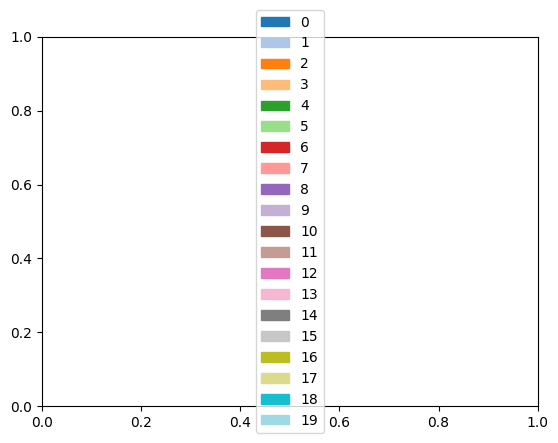

In [370]:
vis_utils.display_legend(np.unique(volume), vis_utils.get_cmap(len(np.unique(volume))))
plt.savefig('/data/estorrs/sandbox/subclone_ht397b1_visium_nbhds_legend.svg', dpi=300)

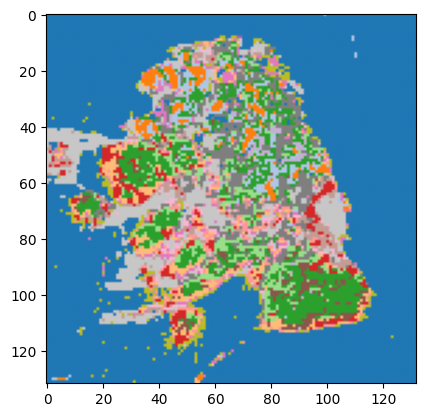

In [369]:
rgb = vis_utils.display_labeled_as_rgb(volume[0])
plt.imshow(rgb)
plt.savefig('/data/estorrs/sandbox/subclone_ht397b1_visium_nbhds.svg', dpi=300)

In [357]:
# !cat /data/estorrs/mushroom/data/projects/subclone/mushroom/HT397B1/config.yaml
!cat /data/estorrs/mushroom/data/projects/submission_v1/HT206B1/mushroom_50res/config.yaml

dtype_specific_params:
  he:
    trainer_kwargs:
      steps_per_epoch: 1000
  multiplex:
    trainer_kwargs:
      channel_mapping:
        AMACR: AMACR
        AMACR (D): AMACR
        AMACR (Dnew): AMACR
        AMACR (d): AMACR
        AMACR(D): AMACR
        AMACR(Dnew): AMACR
        AMACR(d): AMACR
        AMACR-(D): AMACR
        AMACR-(Dnew): AMACR
        AMACR-(d): AMACR
        AQP1: AQP1
        AQP1 (D): AQP1
        AQP1 (Dnew): AQP1
        AQP1 (d): AQP1
        AQP1(D): AQP1
        AQP1(Dnew): AQP1
        AQP1(d): AQP1
        AQP1-(D): AQP1
        AQP1-(Dnew): AQP1
        AQP1-(d): AQP1
        AQP2: AQP2
        AQP2 (D): AQP2
        AQP2 (Dnew): AQP2
        AQP2 (d): AQP2
        AQP2(D): AQP2
        AQP2(Dnew): AQP2
        AQP2(d): AQP2
        AQP2-(D): AQP2
        AQP2-(Dnew): AQP2
        AQP2-(d): AQP2
        AR: AR
        AR (D): AR
        AR (Dnew): AR
        AR (d): AR
        AR(D): AR
        AR(Dnew): AR
        AR(d): AR
        AR-(D): AR


In [358]:
config = yaml.safe_load(open('/data/estorrs/mushroom/data/projects/subclone/mushroom/HT397B1/config.yaml'))
sid_to_adata = {
    ('HT397B1-U1', 'visium'): sc.read_h5ad('/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s0_visium_processed.h5ad'),
    ('HT397B1-U21', 'visium'): sc.read_h5ad('/data/estorrs/mushroom/data/projects/subclone/registered/HT397B1/s3_visium_processed.h5ad'),
}

In [359]:
for (sid, dtype), a in sid_to_adata.items():
    pts = a.obsm['spatial']
    labels = mushroom.assign_pts(pts, (sid, dtype), dtype, level=-1, volume=volume, use_volume=True)
    a.obs['nbhd'] = [f'nbhd {l}' for l in labels]
    a.obs['annotation'] = [sub if 'clone' in sub else nbhd
                           for sub, nbhd in zip(a.obs['subclone'], a.obs['nbhd'])]


In [360]:
# harmonize

In [361]:
a.obs

in_tissue  array_row  array_col  FC1    FC2  \
HT397B1-U21_AAACAGAGCGACTCCT-1          1         14         94  3.0  402.0   
HT397B1-U21_AAACAGCTTTCAGAAG-1          1         43          9  0.0    0.0   
HT397B1-U21_AAACAGTGTTCCTGGG-1          1         73         43  0.0    0.0   
HT397B1-U21_AAACCGGGTAGGTACC-1          1         42         28  0.0    0.0   
HT397B1-U21_AAACCGTTCGTCCAGG-1          1         52         42  2.0  232.0   
...                                   ...        ...        ...  ...    ...   
HT397B1-U21_TTGTTCAGTGTGCTAC-1          1         24         64  0.0    0.0   
HT397B1-U21_TTGTTGTGTGTCAAGA-1          1         31         77  0.0    0.0   
HT397B1-U21_TTGTTTCACATCCAGG-1          1         58         42  1.0  232.0   
HT397B1-U21_TTGTTTCATTAGTCTA-1          1         60         30  0.0    0.0   
HT397B1-U21_TTGTTTGTATTACACG-1          1         73         41  0.0    0.0   

                                FC3    FC4  FC5    FC6  \
HT397B1-U21_AAACAGAGCGACTCCT-1  3.0  402.0  3.0  402.0   
HT397B1-U21_AAACAGCTTTCAGAAG-1  0.0    0.0  0.0    0.0   
HT397B1-U21_AAACAGTGTTCCTGGG-1  0.0    0.0  0.0    0.0   
HT397B1-U21_AAACCGGGTAGGTACC-1  0.0    0.0  0.0    0.0   
HT397B1-U21_AAACCGTTCGTCCAGG-1  2.0  232.0  2.0  232.0   
...                             ...    ...  ...    ...   
HT397B1-U21_TTGTTCAGTGTGCTAC-1  0.0    0.0  0.0    0.0   
HT397B1-U21_TTGTTGTGTGTCAAGA-1  0.0    0.0  0.0    0.0   
HT397B1-U21_TTGTTTCACATCCAGG-1  1.0  232.0  1.0  232.0   
HT397B1-U21_TTGTTTCATTAGTCTA-1  0.0    0.0  0.0    0.0   
HT397B1-U21_TTGTTTGTATTACACG-1  0.0    0.0  0.0    0.0   

                                Filtered tumor regions  ...  Tumor boundary  \
HT397B1-U21_AAACAGAGCGACTCCT-1                     1.0  ...             NaN   
HT397B1-U21_AAACAGCTTTCAGAAG-1                     0.0  ...             NaN   
HT397B1-U21_AAACAGTGTTCCTGGG-1                     0.0  ...             NaN   
HT397B1-U21_AAACCGGGTAGGTACC-1                     0.0  ...             NaN   
HT397B1-U21_AAACCGTTCGTCCAGG-1                     2.0  ...             NaN   
...                                                ...  ...             ...   
HT397B1-U21_TTGTTCAGTGTGCTAC-1                     0.0  ...             NaN   
HT397B1-U21_TTGTTGTGTGTCAAGA-1                     0.0  ...             NaN   
HT397B1-U21_TTGTTTCACATCCAGG-1                     2.0  ...  Tumor boundary   
HT397B1-U21_TTGTTTCATTAGTCTA-1                     0.0  ...             NaN   
HT397B1-U21_TTGTTTGTATTACACG-1                     0.0  ...             NaN   

                               Tumor regions  Tumor vs. TME  \
HT397B1-U21_AAACAGAGCGACTCCT-1           1.0            TME   
HT397B1-U21_AAACAGCTTTCAGAAG-1           0.0            TME   
HT397B1-U21_AAACAGTGTTCCTGGG-1           0.0            TME   
HT397B1-U21_AAACCGGGTAGGTACC-1           0.0            TME   
HT397B1-U21_AAACCGTTCGTCCAGG-1           2.0            TME   
...                                      ...            ...   
HT397B1-U21_TTGTTCAGTGTGCTAC-1           0.0            TME   
HT397B1-U21_TTGTTGTGTGTCAAGA-1           0.0            TME   
HT397B1-U21_TTGTTTCACATCCAGG-1           2.0            TME   
HT397B1-U21_TTGTTTCATTAGTCTA-1           0.0            TME   
HT397B1-U21_TTGTTTGTATTACACG-1           0.0            TME   

                                           barcode            library_id  \
HT397B1-U21_AAACAGAGCGACTCCT-1  AAACAGAGCGACTCCT-1  HT397B1-S1H3A1U21Bp1   
HT397B1-U21_AAACAGCTTTCAGAAG-1  AAACAGCTTTCAGAAG-1  HT397B1-S1H3A1U21Bp1   
HT397B1-U21_AAACAGTGTTCCTGGG-1  AAACAGTGTTCCTGGG-1  HT397B1-S1H3A1U21Bp1   
HT397B1-U21_AAACCGGGTAGGTACC-1  AAACCGGGTAGGTACC-1  HT397B1-S1H3A1U21Bp1   
HT397B1-U21_AAACCGTTCGTCCAGG-1  AAACCGTTCGTCCAGG-1  HT397B1-S1H3A1U21Bp1   
...                                            ...                   ...   
HT397B1-U21_TTGTTCAGTGTGCTAC-1  TTGTTCAGTGTGCTAC-1  HT397B1-S1H3A1U21Bp1   
HT397B1-U21_TTGTTGTGTGTCAAGA-1  TTGTTGTGTGTCAAGA-1  HT397B1-S1H3A1U21Bp1

... storing 'nbhd' as categorical
... storing 'annotation' as categorical


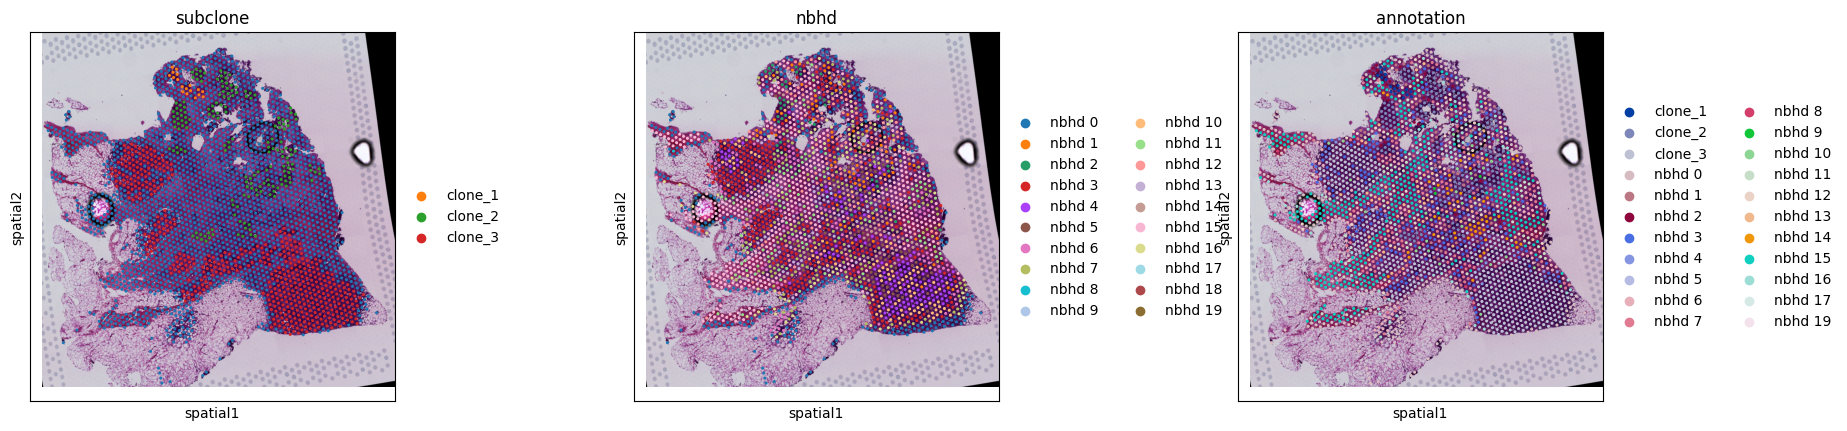

In [362]:
sc.pl.spatial(a, color=['subclone', 'nbhd', 'annotation'])

In [528]:
import anndata
combined = anndata.concat(sid_to_adata.values())
combined.obs

in_tissue  array_row  array_col  FC1    FC2  \
HT397B1-U1_AAACAAGTATCTCCCA-1           1         50        102  0.0    0.0   
HT397B1-U1_AAACACCAATAACTGC-1           1         59         19  1.0  232.0   
HT397B1-U1_AAACAGAGCGACTCCT-1           1         14         94  0.0    0.0   
HT397B1-U1_AAACAGCTTTCAGAAG-1           1         43          9  0.0    0.0   
HT397B1-U1_AAACAGGGTCTATATT-1           1         47         13  1.0  232.0   
...                                   ...        ...        ...  ...    ...   
HT397B1-U21_TTGTTCAGTGTGCTAC-1          1         24         64  0.0    0.0   
HT397B1-U21_TTGTTGTGTGTCAAGA-1          1         31         77  0.0    0.0   
HT397B1-U21_TTGTTTCACATCCAGG-1          1         58         42  1.0  232.0   
HT397B1-U21_TTGTTTCATTAGTCTA-1          1         60         30  0.0    0.0   
HT397B1-U21_TTGTTTGTATTACACG-1          1         73         41  0.0    0.0   

                                FC3    FC4      FC5    FC6  \
HT397B1-U1_AAACAAGTATCTCCCA-1   0.0    0.0      0.0    0.0   
HT397B1-U1_AAACACCAATAACTGC-1   1.0  232.0      1.0  232.0   
HT397B1-U1_AAACAGAGCGACTCCT-1   0.0    0.0      0.0    0.0   
HT397B1-U1_AAACAGCTTTCAGAAG-1   0.0    0.0      0.0    0.0   
HT397B1-U1_AAACAGGGTCTATATT-1   0.0    0.0  unknown    0.0   
...                             ...    ...      ...    ...   
HT397B1-U21_TTGTTCAGTGTGCTAC-1  0.0    0.0      0.0    0.0   
HT397B1-U21_TTGTTGTGTGTCAAGA-1  0.0    0.0      0.0    0.0   
HT397B1-U21_TTGTTTCACATCCAGG-1  1.0  232.0      1.0  232.0   
HT397B1-U21_TTGTTTCATTAGTCTA-1  0.0    0.0      0.0    0.0   
HT397B1-U21_TTGTTTGTATTACACG-1  0.0    0.0      0.0    0.0   

                                Filtered tumor regions  ...  Tumor boundary  \
HT397B1-U1_AAACAAGTATCTCCCA-1                      0.0  ...             NaN   
HT397B1-U1_AAACACCAATAACTGC-1                     33.0  ...  Tumor boundary   
HT397B1-U1_AAACAGAGCGACTCCT-1                      0.0  ...             NaN   
HT397B1-U1_AAACAGCTTTCAGAAG-1                      0.0  ...             NaN   
HT397B1-U1_AAACAGGGTCTATATT-1                      1.0  ...             NaN   
...                                                ...  ...             ...   
HT397B1-U21_TTGTTCAGTGTGCTAC-1                     0.0  ...             NaN   
HT397B1-U21_TTGTTGTGTGTCAAGA-1                     0.0  ...             NaN   
HT397B1-U21_TTGTTTCACATCCAGG-1                     2.0  ...  Tumor boundary   
HT397B1-U21_TTGTTTCATTAGTCTA-1                     0.0  ...             NaN   
HT397B1-U21_TTGTTTGTATTACACG-1                     0.0  ...             NaN   

                               Tumor regions  Tumor vs. TME  \
HT397B1-U1_AAACAAGTATCTCCCA-1            0.0            TME   
HT397B1-U1_AAACACCAATAACTGC-1           33.0          Tumor   
HT397B1-U1_AAACAGAGCGACTCCT-1            0.0            TME   
HT397B1-U1_AAACAGCTTTCAGAAG-1            0.0            TME   
HT397B1-U1_AAACAGGGTCTATATT-1            1.0          Tumor   
...                                      ...            ...   
HT397B1-U21_TTGTTCAGTGTGCTAC-1           0.0            TME   
HT397B1-U21_TTGTTGTGTGTCAAGA-1           0.0            TME   
HT397B1-U21_TTGTTTCACATCCAGG-1           2.0            TME   
HT397B1-U21_TTGTTTCATTAGTCTA-1           0.0            TME   
HT397B1-U21_TTGTTTGTATTACACG-1           0.0            TME   

                                           barcode            library_id  \
HT397B1-U1_AAACAAGTATCTCCCA-1   AAACAAGTATCTCCCA-1   HT397B1-S1H3A1U1Bp1   
HT397B1-U1_AAACACCAATAACTGC-1   AAACACCAATAACTGC-1   HT397B1-S1H3A1U1Bp1   
HT397B1-U1_AAACAGAGCGACTCCT-1   AAACAGAGCGACTCCT-1   HT397B1-S1H3A1U1Bp1   
HT397B1-U1_AAACAGCTTTCAGAAG-1   AAACAGCTTTCAGAAG-1   HT397B1-S1H3A1U1Bp1   
HT397B1-U1_AAACAGGGTCTATATT-1   AAACAGGGTCTATATT-1   HT397B1-S1H3A1U1Bp1   
...                                            ...                   ...   
HT397B1-U21_TTGTTCAGTGTGCTAC-1  TTGTTCAGTGTGCTAC-1  HT397B1-S1H3A1U21Bp1   
HT397B1-U21_TTGTTGTGTGTC

In [529]:
exclude = [nbhd for nbhd, val in Counter(combined.obs['nbhd']).items() if val <= 10]

counts = Counter([nbhd for clone, nbhd in zip(combined.obs['subclone'], combined.obs['nbhd']) if clone!=''])
total_counts = Counter(combined.obs['nbhd'])

for k, v in counts.items():
    frac = v / total_counts[k]
    print(k, frac)
    if frac > .5:
        exclude.append(k)
    
exclude.append('nbhd 0') # background

combined = combined[np.asarray([True if x not in exclude else False for x in combined.obs['nbhd']])]
combined

nbhd 15 0.097708082026538
nbhd 2 0.5072463768115942
nbhd 1 0.4262295081967213
nbhd 3 0.4152046783625731
nbhd 4 0.518361581920904
nbhd 5 0.32142857142857145
nbhd 14 0.2040358744394619
nbhd 10 0.6375545851528385
nbhd 13 0.22085889570552147
nbhd 16 0.17894736842105263
nbhd 12 0.2535211267605634
nbhd 9 0.3103448275862069
nbhd 7 0.19333333333333333
nbhd 0 0.1308980213089802
nbhd 6 0.23636363636363636
nbhd 11 0.10931174089068826
nbhd 8 0.3333333333333333
nbhd 18 1.0


View of AnnData object with n_obs × n_vars = 3758 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'Filtered tumor regions', 'Filtered tumor regions auto', 'Filtered tumor vs. TME', 'Manual annotation', 'Morphologically processed purity', 'Purity', 'TME before boundary', 'TME boundary', 'Tumor before boundary', 'Tumor boundary', 'Tumor regions', 'Tumor vs. TME', 'barcode', 'library_id', 'original', 'sample_id', 'subclone', 'nbhd', 'annotation'
    obsm: 'spatial'

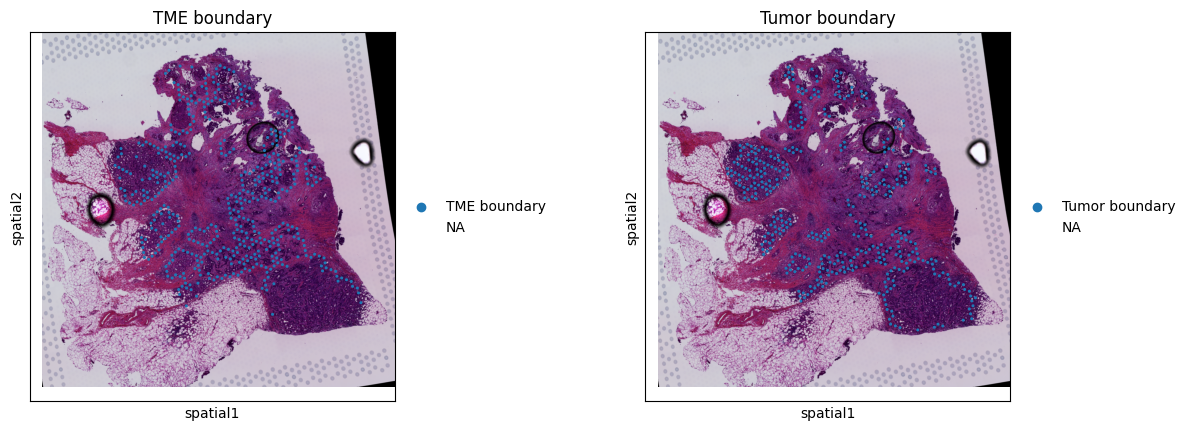

In [530]:
sc.pl.spatial(a, color=['TME boundary', 'Tumor boundary'])

In [531]:
boundary = combined[pd.isnull(combined.obs[['TME boundary', 'Tumor boundary']]).sum(1) < 2]
boundary

View of AnnData object with n_obs × n_vars = 1345 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'Filtered tumor regions', 'Filtered tumor regions auto', 'Filtered tumor vs. TME', 'Manual annotation', 'Morphologically processed purity', 'Purity', 'TME before boundary', 'TME boundary', 'Tumor before boundary', 'Tumor boundary', 'Tumor regions', 'Tumor vs. TME', 'barcode', 'library_id', 'original', 'sample_id', 'subclone', 'nbhd', 'annotation'
    obsm: 'spatial'

In [536]:
bb = boundary[boundary.obs['Tumor boundary']=='Tumor boundary']
bb

View of AnnData object with n_obs × n_vars = 607 × 17943
    obs: 'in_tissue', 'array_row', 'array_col', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'Filtered tumor regions', 'Filtered tumor regions auto', 'Filtered tumor vs. TME', 'Manual annotation', 'Morphologically processed purity', 'Purity', 'TME before boundary', 'TME boundary', 'Tumor before boundary', 'Tumor boundary', 'Tumor regions', 'Tumor vs. TME', 'barcode', 'library_id', 'original', 'sample_id', 'subclone', 'nbhd', 'annotation'
    obsm: 'spatial'

In [608]:
from collections import Counter

clone_to_counts = {}
data = []
order = [k for k in sorted(set(bb.obs['nbhd'])) if k not in exclude]
clones = [c for c in sorted(set(bb.obs['subclone'])) if c]
total_counts = Counter(bb.obs['nbhd'])
for clone in clones:
    mask = bb.obs['subclone']==clone
    n = np.count_nonzero(mask)
    cs = Counter(bb.obs[mask]['nbhd'])
    d = {k:cs[k] / total_counts[k] for k in order}
    data.append([d.get(k, 0) for k in order])
df = pd.DataFrame(data, index=clones, columns=order).T
df.sort_values('clone_3', ascending=False)

clone_1   clone_2   clone_3
nbhd 6   0.022727  0.090909  0.886364
nbhd 3   0.000000  0.145833  0.854167
nbhd 7   0.051282  0.179487  0.769231
nbhd 11  0.000000  0.333333  0.666667
nbhd 16  0.142857  0.190476  0.666667
nbhd 13  0.000000  0.387097  0.612903
nbhd 5   0.046154  0.353846  0.600000
nbhd 15  0.104478  0.477612  0.417910
nbhd 12  0.151515  0.484848  0.363636
nbhd 14  0.081081  0.675676  0.243243
nbhd 9   0.153846  0.692308  0.153846
nbhd 1   0.173077  0.788462  0.038462

In [612]:
source = df.copy()
source['nbhd'] = source.index.to_list()
source = source.melt(id_vars=['nbhd'])
source

nbhd variable     value
0    nbhd 1  clone_1  0.173077
1   nbhd 11  clone_1  0.000000
2   nbhd 12  clone_1  0.151515
3   nbhd 13  clone_1  0.000000
4   nbhd 14  clone_1  0.081081
5   nbhd 15  clone_1  0.104478
6   nbhd 16  clone_1  0.142857
7    nbhd 3  clone_1  0.000000
8    nbhd 5  clone_1  0.046154
9    nbhd 6  clone_1  0.022727
10   nbhd 7  clone_1  0.051282
11   nbhd 9  clone_1  0.153846
12   nbhd 1  clone_2  0.788462
13  nbhd 11  clone_2  0.333333
14  nbhd 12  clone_2  0.484848
15  nbhd 13  clone_2  0.387097
16  nbhd 14  clone_2  0.675676
17  nbhd 15  clone_2  0.477612
18  nbhd 16  clone_2  0.190476
19   nbhd 3  clone_2  0.145833
20   nbhd 5  clone_2  0.353846
21   nbhd 6  clone_2  0.090909
22   nbhd 7  clone_2  0.179487
23   nbhd 9  clone_2  0.692308
24   nbhd 1  clone_3  0.038462
25  nbhd 11  clone_3  0.666667
26  nbhd 12  clone_3  0.363636
27  nbhd 13  clone_3  0.612903
28  nbhd 14  clone_3  0.243243
29  nbhd 15  clone_3  0.417910
30  nbhd 16  clone_3  0.666667
31   nbhd 3  clone_3  0.854167
32   nbhd 5  clone_3  0.600000
33   nbhd 6  clone_3  0.886364
34   nbhd 7  clone_3  0.769231
35   nbhd 9  clone_3  0.153846

In [620]:
import altair as alt
nbhd_order = df.sort_values('clone_3', ascending=False).index.to_list()
alt.Chart(source).mark_bar().encode(
    x='sum(value)',
    y=alt.Y('nbhd', sort=nbhd_order),
    color='variable'
)

alt.Chart(...)

In [11]:
def get_nbhd_rgb(labeled, nbhds, cmap=None):
    rgb = vis_utils.display_labeled_as_rgb(labeled, cmap=cmap)
    
    m = np.zeros_like(labeled, dtype=bool)
    for l in nbhds:
        m |= labeled==l
    
    rgb[~m] = 0.
    
    return rgb

def get_intensity_img(case, dtype, gene):
    dtype_to_true_pixels = pickle.load(
        open(os.path.join(project_dir, case, 'mushroom_50res', 'true_pixels.pkl'), 'rb')
    )
    
    channels, true_pixels = dtype_to_true_pixels[dtype]['channels'], dtype_to_true_pixels[dtype]['true_pixels']
    true_pixels = true_pixels[0]
    
    img = true_pixels[..., channels.index(gene)]
    
    return img


In [544]:
df.sort_values('clone_3', ascending=False)

clone_1   clone_2   clone_3
nbhd 6   0.022727  0.090909  0.886364
nbhd 3   0.000000  0.145833  0.854167
nbhd 7   0.051282  0.179487  0.769231
nbhd 11  0.000000  0.333333  0.666667
nbhd 16  0.142857  0.190476  0.666667
nbhd 13  0.000000  0.387097  0.612903
nbhd 5   0.046154  0.353846  0.600000
nbhd 15  0.104478  0.477612  0.417910
nbhd 12  0.151515  0.484848  0.363636
nbhd 14  0.081081  0.675676  0.243243
nbhd 9   0.153846  0.692308  0.153846
nbhd 1   0.173077  0.788462  0.038462

In [545]:
n = df.shape[0] // 4 # quartiles
idc_group = df.sort_values('clone_3', ascending=False).index[:n].to_list()
dcis_group = df.sort_values('clone_3', ascending=False).index[-n:].to_list()
order = idc_group + dcis_group[::-1]
idc_group, dcis_group

(['nbhd 6', 'nbhd 3', 'nbhd 7'], ['nbhd 14', 'nbhd 9', 'nbhd 1'])

In [598]:
mapping = {
    6: (121, 171, 73),
    3: (36, 84, 181),
    7: (28, 135, 101),
    1: (143, 69, 196),
    9: (189, 40, 127),
    14: (201, 90, 42),
}
mapping.keys()

dict_keys([6, 3, 7, 1, 9, 14])

In [596]:
cmap = sns.color_palette('tab20')
for i in range(len(cmap)):
    if i in mapping:
        cmap[i] = np.asarray(mapping[i]) / 255.
cmap

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 array([0.56078431, 0.27058824, 0.76862745]),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 array([0.14117647, 0.32941176, 0.70980392]),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 array([0.4745098 , 0.67058824, 0.28627451]),
 array([0.10980392, 0.52941176, 0.39607843]),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 array([0.74117647, 0.15686275, 0.49803922]),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 array([0.78823529, 0.35294118, 0.16470588]),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

(-0.5, 131.5, 131.5, -0.5)

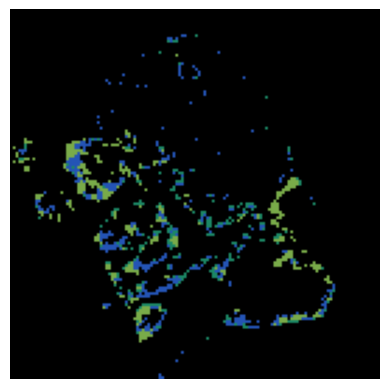

In [605]:

rgb = get_nbhd_rgb(volume[0], [int(x.split(' ')[-1]) for x in idc_group], cmap=cmap)
plt.imshow(rgb)
plt.axis('off')

(-0.5, 131.5, 131.5, -0.5)

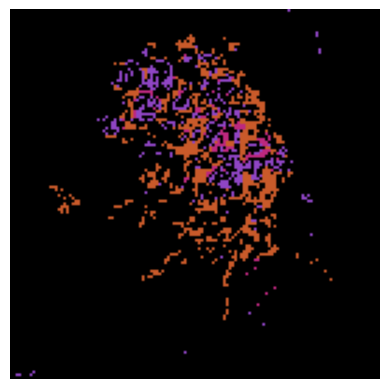

In [606]:

rgb = get_nbhd_rgb(volume[0], [int(x.split(' ')[-1]) for x in dcis_group], cmap=cmap)
plt.imshow(rgb)
plt.axis('off')

(-0.5, 131.5, 131.5, -0.5)

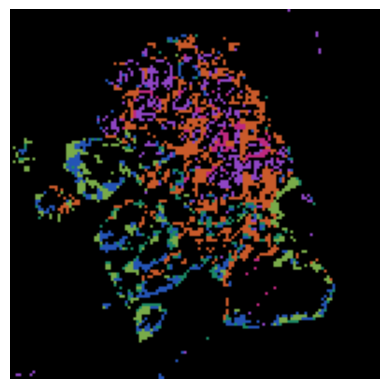

In [607]:

rgb = get_nbhd_rgb(volume[0], [int(x.split(' ')[-1]) for x in order], cmap=cmap)
plt.imshow(rgb)
plt.axis('off')

In [553]:
fps = sorted(utils.listfiles('/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/auxiliary/multiplex/'))
fps

['/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/auxiliary/multiplex/HT397B1-U12.txt',
 '/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/auxiliary/multiplex/HT397B1-U2.txt',
 '/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/auxiliary/multiplex/HT397B1-U22.txt',
 '/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/auxiliary/multiplex/HT397B1-U31.txt']

In [554]:
for fp in fps:
    df = pd.read_csv(fp, sep='\t')
    labels = set(df['cell_type'])
    print(fp, labels)

/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/auxiliary/multiplex/HT397B1-U12.txt {'Endothelial', 'Fibroblast', 'Immune', 'Epithelial', 'Unlabeled'}
/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/auxiliary/multiplex/HT397B1-U2.txt {'Endothelial', 'Fibroblast', 'Immune', 'Epithelial', 'Unlabeled'}
/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/auxiliary/multiplex/HT397B1-U22.txt {'CD8 T cell', 'Endothelial', 'Dendritic', 'Fibroblast', 'Immune', 'Epithelial', 'T cell', 'Treg', 'Unlabeled'}
/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/auxiliary/multiplex/HT397B1-U31.txt {'CD8 T cell', 'Endothelial', 'Fibroblast', 'Immune', 'Epithelial', 'T cell', 'Treg', 'Unlabeled'}


In [555]:
case_to_feat_df = {}
for fp in fps:
    case = fp.split('/')[-1].replace('.txt', '')
    df = pd.read_csv(fp, sep='\t')
    df['case'] = case
    df = df[['row', 'col', 'case', 'cell_type']]

    labels = set(df['cell_type'])
    if 'T cell' in labels: # make sure we only do the t cell ones
        case_to_feat_df[case] = df
case_to_feat_df.keys()

dict_keys(['HT397B1-U22', 'HT397B1-U31'])

In [556]:
for case, df in case_to_feat_df.items():
    pts = df[['col', 'row']].values
    labels = mushroom.assign_pts(pts, (case, 'multiplex'), 'integrated', use_volume=True, volume=volume)
    df['nbhd'] = [f'nbhd {x}' for x in labels]
next(iter(case_to_feat_df.values()))

row    col         case   cell_type     nbhd
0         116   4495  HT397B1-U22   Unlabeled   nbhd 0
1         148   4061  HT397B1-U22   Unlabeled   nbhd 0
2         133   4286  HT397B1-U22   Unlabeled   nbhd 0
3         748   8711  HT397B1-U22   Unlabeled   nbhd 0
4         865   6667  HT397B1-U22   Unlabeled   nbhd 0
...       ...    ...          ...         ...      ...
154091  18620   7012  HT397B1-U22  Epithelial  nbhd 16
154092  18619   7061  HT397B1-U22  Epithelial  nbhd 16
154093  18632   7025  HT397B1-U22  Epithelial  nbhd 16
154094  17989  14840  HT397B1-U22   Unlabeled   nbhd 0
154095  18334  17080  HT397B1-U22   Unlabeled   nbhd 0

[154096 rows x 5 columns]

(-901.7, 18935.7, 19565.15, -810.1500000000001)

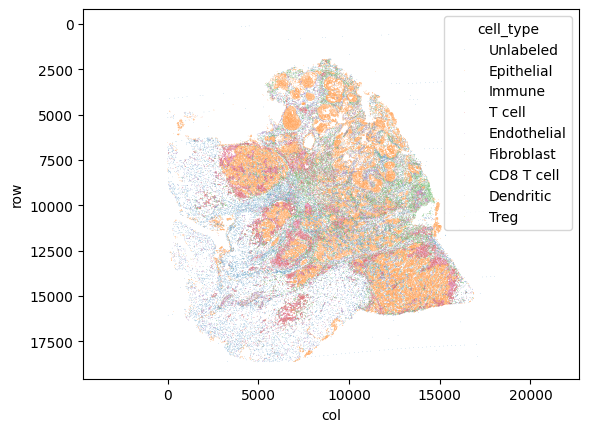

In [558]:
sns.scatterplot(case_to_feat_df['HT397B1-U22'], x='col', y='row', hue='cell_type', s=.1)
plt.gca().invert_yaxis()
plt.axis('equal')

In [565]:
show = ['CD8 T cell', 'T cell', 'Treg', 'Fibroblast']

In [559]:
df = pd.concat(case_to_feat_df.values(), axis=0)

nbhds = sorted(set(df['nbhd']))
cts = sorted(set(df['cell_type']))
data = []
for nbhd in nbhds:
    f = df[df['nbhd']==nbhd]
    counts = Counter(f['cell_type'])
    data.append([counts.get(ct, 0) for ct in cts])
count_df = pd.DataFrame(data=data, columns=cts, index=nbhds)
count_df

CD8 T cell  Dendritic  Endothelial  Epithelial  Fibroblast  Immune  \
nbhd 0         1771         42         5214       12859        2375    4328   
nbhd 1          191          5          511        3381         724     905   
nbhd 10         847          5          664       11098         357    1345   
nbhd 11         829         10          928        2025         483    2444   
nbhd 12         347          5          737        4903        1257    1475   
nbhd 13         732         10          803        3659         756    2144   
nbhd 14         365          7          615        3025        1149    1517   
nbhd 15        1861         42         3106        9045        2179    7221   
nbhd 16        1033          6         1150        4882        1104    2014   
nbhd 17           6          0            9          69          23      25   
nbhd 18           1          0           12          47           5      13   
nbhd 19           1          0            7         116          18      15   
nbhd 2           62          0          172        2040         227     271   
nbhd 3         2854         28         1619       16803        1111    3768   
nbhd 4          662         10          758        9795         726    1289   
nbhd 5          356          5          375        2865         421     828   
nbhd 6         1334         12          773        4088         180    1884   
nbhd 7         1792         21         1229        6857         820    3327   
nbhd 8            8          0           13          13           0      57   
nbhd 9           16          0           58         145         109      91   

         T cell  Treg  Unlabeled  
nbhd 0     7453    37      17229  
nbhd 1      600    15        475  
nbhd 10    2477    28        704  
nbhd 11    2871    18       1958  
nbhd 12    1287    18       1055  
nbhd 13    2532    28       1234  
nbhd 14    1326    22        834  
nbhd 15    7488    93       7488  
nbhd 16    3306    24       2546  
nbhd 17      15     1          9  
nbhd 18       6     0          6  
nbhd 19       4     0          4  
nbhd 2      207     5        168  
nbhd 3     7693   103       2061  
nbhd 4     1923    26        928  
nbhd 5     1098    14        503  
nbhd 6     3934    30       1219  
nbhd 7     5294    57       1825  
nbhd 8       43     0         25  
nbhd 9       66     1         40

In [560]:
count_df.loc[order]

CD8 T cell  Dendritic  Endothelial  Epithelial  Fibroblast  Immune  \
nbhd 6         1334         12          773        4088         180    1884   
nbhd 3         2854         28         1619       16803        1111    3768   
nbhd 7         1792         21         1229        6857         820    3327   
nbhd 1          191          5          511        3381         724     905   
nbhd 9           16          0           58         145         109      91   
nbhd 14         365          7          615        3025        1149    1517   

         T cell  Treg  Unlabeled  
nbhd 6     3934    30       1219  
nbhd 3     7693   103       2061  
nbhd 7     5294    57       1825  
nbhd 1      600    15        475  
nbhd 9       66     1         40  
nbhd 14    1326    22        834

In [566]:
frac_df = count_df / np.expand_dims(count_df.values.sum(1), -1)
frac_df.loc[order, show]

CD8 T cell    T cell      Treg  Fibroblast
nbhd 6     0.099153  0.292404  0.002230    0.013379
nbhd 3     0.079190  0.213457  0.002858    0.030827
nbhd 7     0.084441  0.249458  0.002686    0.038639
nbhd 1     0.028059  0.088145  0.002204    0.106361
nbhd 9     0.030418  0.125475  0.001901    0.207224
nbhd 14    0.041196  0.149661  0.002483    0.129684

In [567]:
frac_df = count_df / np.expand_dims(count_df.values.sum(1), -1)
frac_df.loc[order,]

CD8 T cell  Dendritic  Endothelial  Epithelial  Fibroblast    Immune  \
nbhd 6     0.099153   0.000892     0.057455    0.303850    0.013379  0.140033   
nbhd 3     0.079190   0.000777     0.044922    0.466232    0.030827  0.104550   
nbhd 7     0.084441   0.000990     0.057912    0.323108    0.038639  0.156771   
nbhd 1     0.028059   0.000735     0.075070    0.496695    0.106361  0.132951   
nbhd 9     0.030418   0.000000     0.110266    0.275665    0.207224  0.173004   
nbhd 14    0.041196   0.000790     0.069413    0.341422    0.129684  0.171219   

           T cell      Treg  Unlabeled  
nbhd 6   0.292404  0.002230   0.090605  
nbhd 3   0.213457  0.002858   0.057186  
nbhd 7   0.249458  0.002686   0.085996  
nbhd 1   0.088145  0.002204   0.069781  
nbhd 9   0.125475  0.001901   0.076046  
nbhd 14  0.149661  0.002483   0.094131

In [624]:
frac_df.loc[nbhd_order, ['CD8 T cell', 'T cell', 'Fibroblast']] # t cell and fibroblast only

CD8 T cell    T cell  Fibroblast
nbhd 6     0.099153  0.292404    0.013379
nbhd 3     0.079190  0.213457    0.030827
nbhd 7     0.084441  0.249458    0.038639
nbhd 11    0.071676  0.248228    0.041760
nbhd 16    0.064301  0.205789    0.068721
nbhd 13    0.061523  0.212809    0.063540
nbhd 5     0.055066  0.169838    0.065120
nbhd 15    0.048309  0.194377    0.056564
nbhd 12    0.031306  0.116113    0.113407
nbhd 14    0.041196  0.149661    0.129684
nbhd 9     0.030418  0.125475    0.207224
nbhd 1     0.028059  0.088145    0.106361

In [629]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

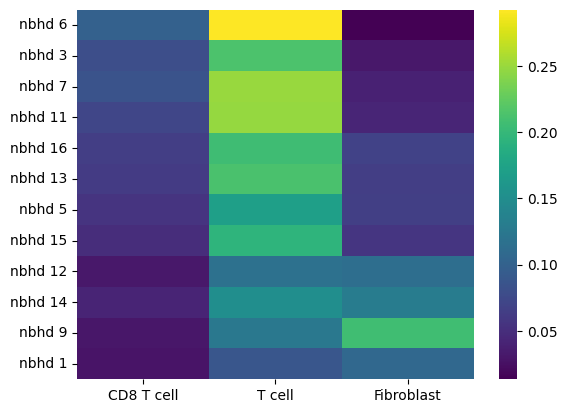

In [630]:
sns.heatmap(
    frac_df.loc[nbhd_order, ['CD8 T cell', 'T cell', 'Fibroblast']], cmap='viridis'
)
plt.savefig('/data/estorrs/sandbox/subclone_ht397B1_ct_fractions.svg')

# HT268

In [12]:
case = 'HT268B1'

In [16]:
mushroom = Mushroom.from_config(
    os.path.join('/data/estorrs/mushroom/data/projects/subclone', case, f'mushroom_{target_res}res')
)

INFO:root:loading spore for he
INFO:root:data mask detected
INFO:root:starting he processing
INFO:root:4 sections detected: ['HT268B1-U2', 'HT268B1-U12', 'HT268B1-U22', 'HT268B1-U32']
INFO:root:processing sections
INFO:root:generating image data for section HT268B1-U2


0.007004457303449433


INFO:root:generating image data for section HT268B1-U12
INFO:root:generating image data for section HT268B1-U22
INFO:root:generating image data for section HT268B1-U32


he torch.Size([3, 135, 133])


INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 4 sections detected: [('HT268B1-U2', 'he'), ('HT268B1-U12', 'he'), ('HT268B1-U22', 'he'), ('HT268B1-U32', 'he')]
INFO:root:creating data loaders
INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmph1kavitv
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmph1kavitv/_remote_module_non_scriptable.py
INFO:root:creating ViT
INFO:root:model initialized
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
INFO:root:loading checkpoint: /data/estorrs/mushroom/data/projects/subclone/HT268B1/mushroom_50res/he_chkpts/last-v1.ckpt
INFO:root:loading spore for visium
INFO:root:data mask detected
INFO:root:starting visium processing
INFO:root:using 11051 channels
INFO:root:4 sections detected: ['HT268B1-U2', 'HT268B1-U12', 'HT268B1-U22', 'HT268B1-U32']
INFO:root:process

ppm 0.35022286517247164 target_ppm 100
tiling size 285


INFO:root:generating image data for section HT268B1-U2
INFO:root:generating image data for section HT268B1-U12
INFO:root:generating image data for section HT268B1-U22
INFO:root:generating image data for section HT268B1-U32


visium torch.Size([11051, 68, 68])


INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:total of 4 sections detected: [('HT268B1-U2', 'visium'), ('HT268B1-U12', 'visium'), ('HT268B1-U22', 'visium'), ('HT268B1-U32', 'visium')]
INFO:root:creating data loaders
INFO:root:creating ViT
INFO:root:model initialized
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
INFO:root:loading checkpoint: /data/estorrs/mushroom/data/projects/subclone/HT268B1/mushroom_50res/visium_chkpts/last-v1.ckpt
INFO:root:chkpt files detected, embedding to spores
INFO:root:embedding he spore
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=6

Predicting: |                                                                                                 …

INFO:root:embedding visium spore
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: |                                                                                                 …

he 0


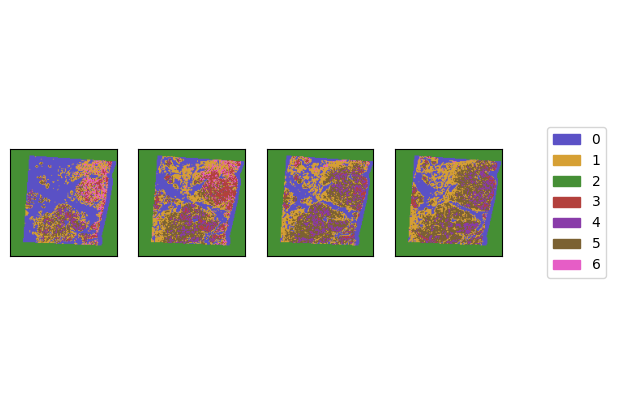

he 1


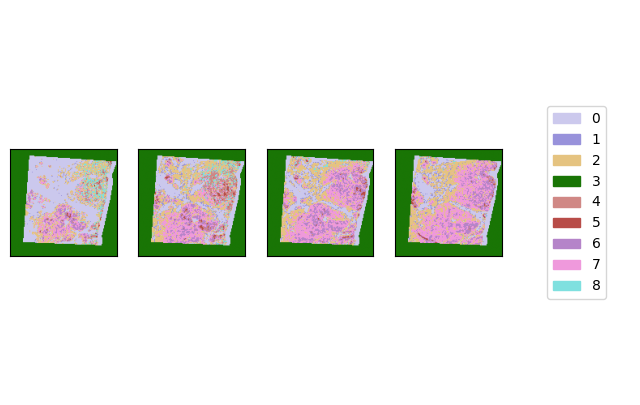

he 2


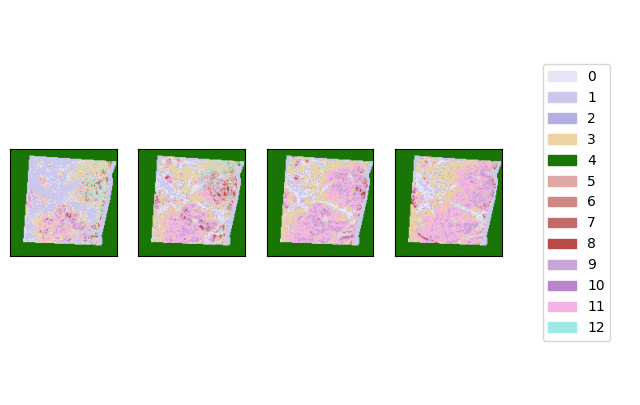

visium 0


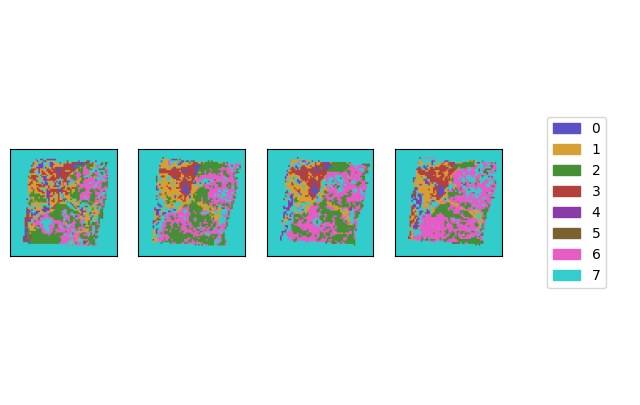

visium 1


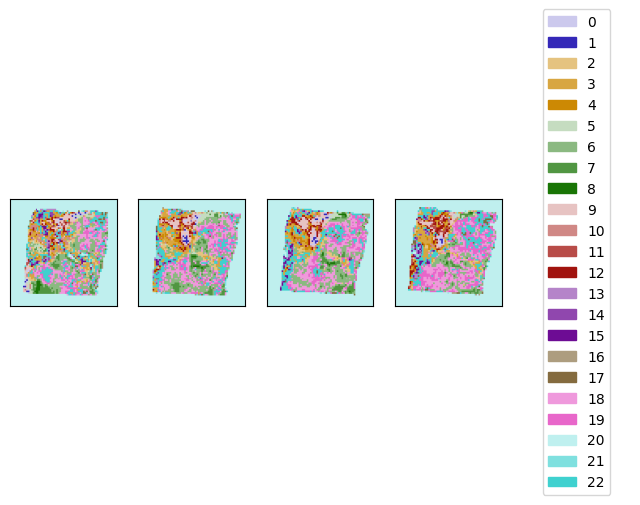

visium 2


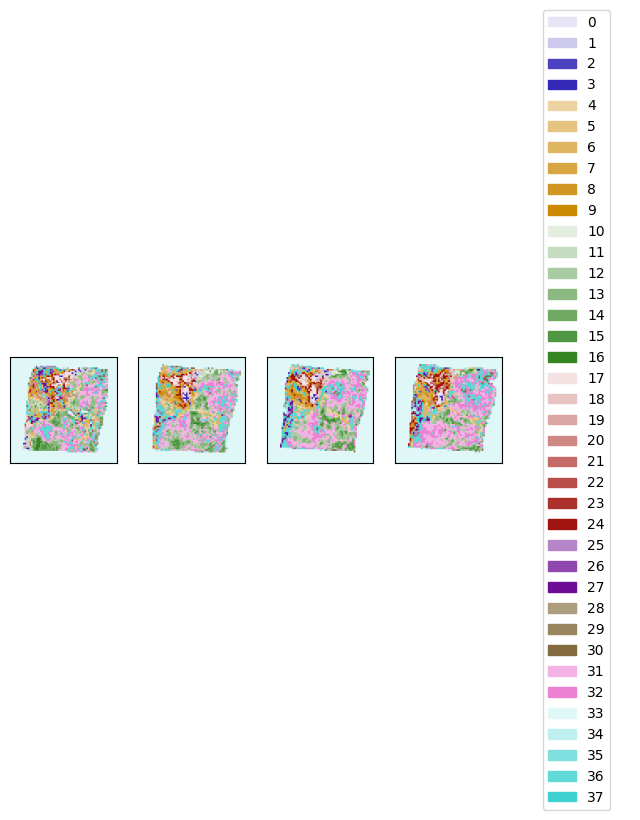

In [357]:
for dtype in mushroom.dtypes:
    for level in range(mushroom.num_levels):
        print(dtype, level)
        mushroom.display_clusters(dtype, level=level)
        plt.show()

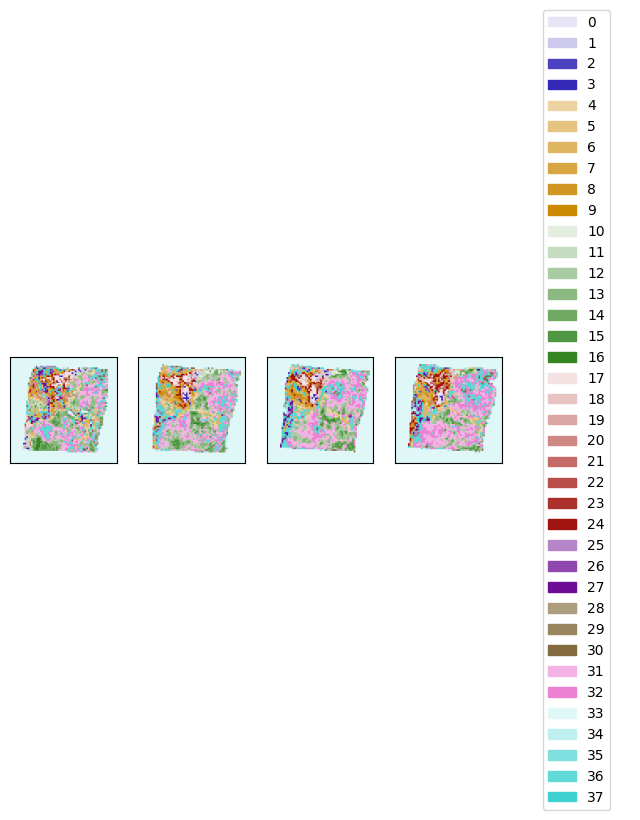

In [358]:
mushroom.display_clusters('visium', level=2)
plt.savefig('/data/estorrs/sandbox/subclone_ht268b1_visium_nbhds.svg', dpi=300)

In [18]:
volume = pickle.load(
    open(os.path.join(mushroom.trainer_kwargs['out_dir'], f'nbhd_volumes_l2.pkl'), 'rb')
)['labeled']['visium']
dtype_to_volume = pickle.load(
    open(os.path.join(mushroom.trainer_kwargs['out_dir'], f'nbhd_volumes_l2.pkl'), 'rb')
)['labeled']

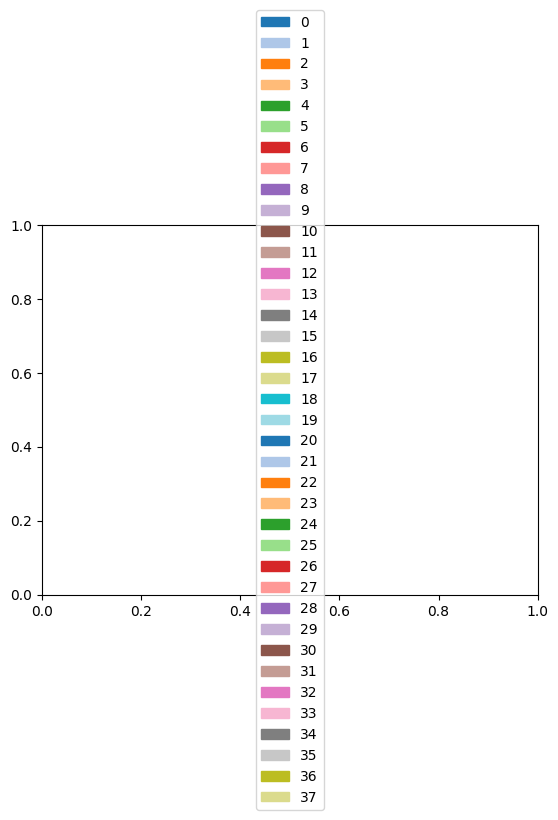

In [19]:
vis_utils.display_legend(np.unique(volume), vis_utils.get_cmap(len(np.unique(volume))))

In [22]:
mushroom.section_ids

[('HT268B1-U2', 'visium'),
 ('HT268B1-U2', 'he'),
 ('HT268B1-U12', 'visium'),
 ('HT268B1-U12', 'he'),
 ('HT268B1-U22', 'visium'),
 ('HT268B1-U22', 'he'),
 ('HT268B1-U32', 'visium'),
 ('HT268B1-U32', 'he')]

In [23]:
# # !cat /data/estorrs/mushroom/data/projects/subclone/mushroom/HT397B1/config.yaml
!cat /data/estorrs/mushroom/data/projects/subclone/mushroom/HT268B1/config.yaml

- data:
  - dtype: visium
    filepath: /data/estorrs/mushroom/data/projects/subclone/registered/HT268B1/s0_visium_processed.h5ad
  id: s0
  position: 0
- data:
  - dtype: visium
    filepath: /data/estorrs/mushroom/data/projects/subclone/registered/HT268B1/s1_visium_processed.h5ad
  id: s1
  position: 200
- data:
  - dtype: visium
    filepath: /data/estorrs/mushroom/data/projects/subclone/registered/HT268B1/s2_visium_processed.h5ad
  id: s2
  position: 300
- data:
  - dtype: visium
    filepath: /data/estorrs/mushroom/data/projects/subclone/registered/HT268B1/s3_visium_processed.h5ad
  id: s3
  position: 400
- data:
  - dtype: visium
    filepath: /data/estorrs/mushroom/data/projects/subclone/registered/HT268B1/s4_visium_processed.h5ad
  id: s4
  position: 500


In [24]:
config = yaml.safe_load(open('/data/estorrs/mushroom/data/projects/subclone/mushroom/HT268B1/config.yaml'))
sid_to_adata = {
    ('HT268B1-U2', 'visium'): sc.read_h5ad('/data/estorrs/mushroom/data/projects/subclone/registered/HT268B1/s1_visium_processed.h5ad'),
    ('HT268B1-U12', 'visium'): sc.read_h5ad('/data/estorrs/mushroom/data/projects/subclone/registered/HT268B1/s2_visium_processed.h5ad'),
    ('HT268B1-U22', 'visium'): sc.read_h5ad('/data/estorrs/mushroom/data/projects/subclone/registered/HT268B1/s3_visium_processed.h5ad'),
    ('HT268B1-U32', 'visium'): sc.read_h5ad('/data/estorrs/mushroom/data/projects/subclone/registered/HT268B1/s4_visium_processed.h5ad'),
}

In [25]:
for (sid, dtype), a in sid_to_adata.items():
    pts = a.obsm['spatial']
    labels = mushroom.assign_pts(pts, (sid, dtype), dtype, level=-1, volume=volume, use_volume=True)
    a.obs['nbhd'] = [f'nbhd {l}' for l in labels]
    a.obs['annotation'] = [sub if 'clone' in sub else nbhd
                           for sub, nbhd in zip(a.obs['subclone'], a.obs['nbhd'])]


In [26]:
# harmonize
list(a.obs.columns)

['in_tissue',
 'array_row',
 'array_col',
 'FC1',
 'FC2',
 'FC3',
 'FC4',
 'FC5',
 'FC6',
 'Filtered tumor regions',
 'Filtered tumor regions auto',
 'Filtered tumor vs. TME',
 'Manual annotation',
 'Morphologically processed purity',
 'Purity',
 'TME before boundary',
 'TME boundary',
 'Tumor before boundary',
 'Tumor boundary',
 'Tumor regions',
 'Tumor vs. TME',
 'barcode',
 'library_id',
 'original',
 'sample_id',
 'subclone',
 'nbhd',
 'annotation']

In [27]:
a.obs

in_tissue  array_row  array_col  FC1     FC2  \
HT268B1-U32_AAACAAGTATCTCCCA-1          1         50        102  0.0     0.0   
HT268B1-U32_AAACACCAATAACTGC-1          1         59         19  3.0   466.0   
HT268B1-U32_AAACAGAGCGACTCCT-1          1         14         94  4.0   617.0   
HT268B1-U32_AAACAGCTTTCAGAAG-1          1         43          9  4.0   614.0   
HT268B1-U32_AAACAGGGTCTATATT-1          1         47         13  7.0  1393.0   
...                                   ...        ...        ...  ...     ...   
HT268B1-U32_TTGTTGTGTGTCAAGA-1          1         31         77  7.0  1296.0   
HT268B1-U32_TTGTTTCACATCCAGG-1          1         58         42  0.0     0.0   
HT268B1-U32_TTGTTTCATTAGTCTA-1          1         60         30  2.0   232.0   
HT268B1-U32_TTGTTTCCATACAACT-1          1         45         27  7.0  1234.0   
HT268B1-U32_TTGTTTGTATTACACG-1          1         73         41  0.0     0.0   

                                FC3     FC4      FC5     FC6  \
HT268B1-U32_AAACAAGTATCTCCCA-1  0.0     0.0      0.0     0.0   
HT268B1-U32_AAACACCAATAACTGC-1  3.0   466.0      3.0   466.0   
HT268B1-U32_AAACAGAGCGACTCCT-1  4.0   617.0      4.0   617.0   
HT268B1-U32_AAACAGCTTTCAGAAG-1  4.0   614.0      4.0   614.0   
HT268B1-U32_AAACAGGGTCTATATT-1  8.0  1453.0  unknown     0.0   
...                             ...     ...      ...     ...   
HT268B1-U32_TTGTTGTGTGTCAAGA-1  7.0  1296.0      7.0  1296.0   
HT268B1-U32_TTGTTTCACATCCAGG-1  0.0     0.0      0.0     0.0   
HT268B1-U32_TTGTTTCATTAGTCTA-1  2.0   232.0      2.0   232.0   
HT268B1-U32_TTGTTTCCATACAACT-1  7.0  1234.0      7.0  1234.0   
HT268B1-U32_TTGTTTGTATTACACG-1  0.0     0.0      0.0     0.0   

                                Filtered tumor regions  ...  Tumor boundary  \
HT268B1-U32_AAACAAGTATCTCCCA-1                     0.0  ...             NaN   
HT268B1-U32_AAACACCAATAACTGC-1                     1.0  ...             NaN   
HT268B1-U32_AAACAGAGCGACTCCT-1                     2.0  ...             NaN   
HT268B1-U32_AAACAGCTTTCAGAAG-1                     1.0  ...             NaN   
HT268B1-U32_AAACAGGGTCTATATT-1                     1.0  ...             NaN   
...                                                ...  ...             ...   
HT268B1-U32_TTGTTGTGTGTCAAGA-1                     2.0  ...             NaN   
HT268B1-U32_TTGTTTCACATCCAGG-1                     0.0  ...             NaN   
HT268B1-U32_TTGTTTCATTAGTCTA-1                     1.0  ...             NaN   
HT268B1-U32_TTGTTTCCATACAACT-1                     1.0  ...             NaN   
HT268B1-U32_TTGTTTGTATTACACG-1                     0.0  ...             NaN   

                               Tumor regions  Tumor vs. TME  \
HT268B1-U32_AAACAAGTATCTCCCA-1           0.0            TME   
HT268B1-U32_AAACACCAATAACTGC-1           1.0          Tumor   
HT268B1-U32_AAACAGAGCGACTCCT-1           2.0          Tumor   
HT268B1-U32_AAACAGCTTTCAGAAG-1           1.0          Tumor   
HT268B1-U32_AAACAGGGTCTATATT-1           1.0          Tumor   
...                                      ...            ...   
HT268B1-U32_TTGTTGTGTGTCAAGA-1           2.0          Tumor   
HT268B1-U32_TTGTTTCACATCCAGG-1           0.0            TME   
HT268B1-U32_TTGTTTCATTAGTCTA-1           1.0          Tumor   
HT268B1-U32_TTGTTTCCATACAACT-1           1.0          Tumor   
HT268B1-U32_TTGTTTGTATTACACG-1           0.0            TME   

                                           barcode                library_id  \
HT268B1-U32_AAACAAGTATCTCCCA-1  AAACAAGTATCTCCCA-1  HT268B1-Th1H3Fc2U32Z1Bs1   
HT268B1-U32_AAACACCAATAACTGC-1  AAACACCAATAACTGC-1  HT268B1-Th1H3Fc2U32Z1Bs1   
HT268B1-U32_AAACAGAGCGACTCCT-1  AAACAGAGCGACTCCT-1  HT268B1-Th1H3Fc2U32Z1Bs1   
HT268B1-U32_AAACAGCTTTCAGAAG-1  AAACAGCTTTCAGAAG-1  HT268B1-Th1H3Fc2U32Z1Bs1   
HT268B1-U32_AAACAGGGTCTATATT-1  AAACAGGGTCTATATT-1  HT268B1-Th1H3Fc2U32Z1Bs1   
...                                            ...                       ...   
HT268B1-U32_TTGTTGTGTGTCAAGA-1  TTGT

... storing 'nbhd' as categorical
... storing 'annotation' as categorical


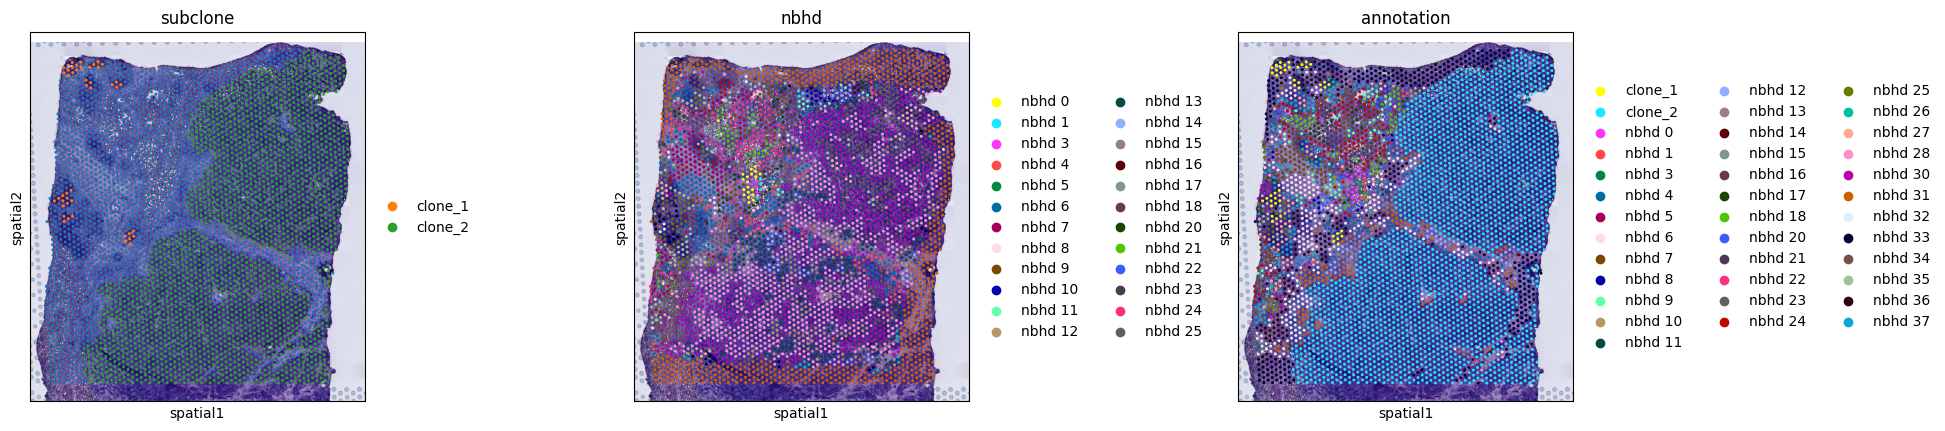

In [28]:
sc.pl.spatial(a, color=['subclone', 'nbhd', 'annotation'])

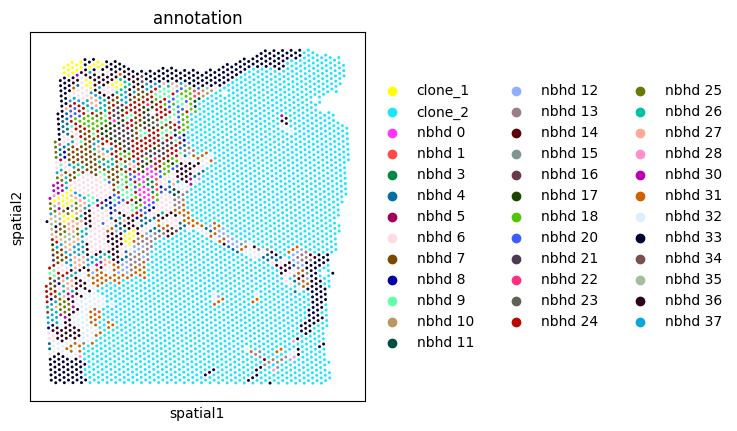

In [30]:
sc.pl.spatial(a, color=['annotation'], alpha_img=0)

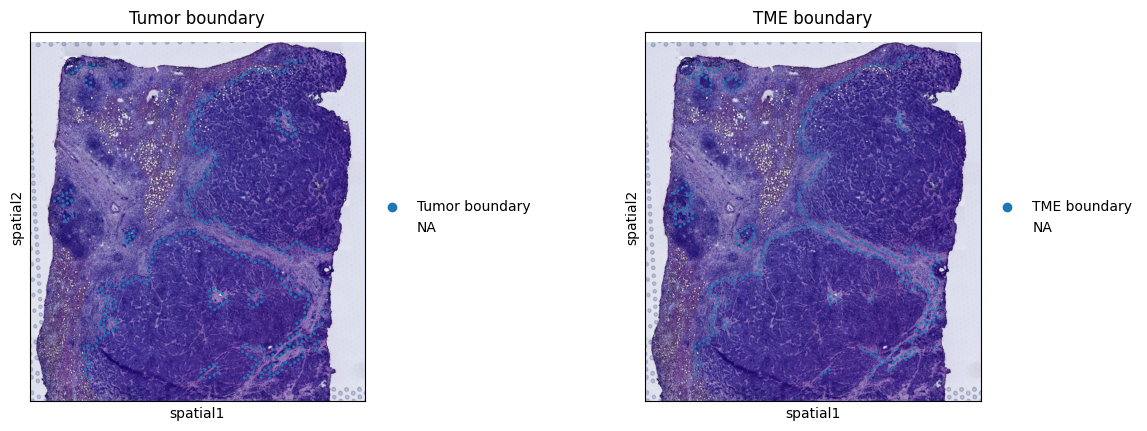

In [31]:
sc.pl.spatial(a, color=['Tumor boundary', 'TME boundary'])

In [32]:
import anndata
combined = anndata.concat(sid_to_adata.values())
combined.obs

in_tissue  array_row  array_col  FC1     FC2  \
HT268B1-U2_AAACAAGTATCTCCCA-1           1         50        102  0.0     0.0   
HT268B1-U2_AAACACCAATAACTGC-1           1         59         19  3.0   418.0   
HT268B1-U2_AAACAGAGCGACTCCT-1           1         14         94  3.0   483.0   
HT268B1-U2_AAACAGCTTTCAGAAG-1           1         43          9  4.0   638.0   
HT268B1-U2_AAACAGGGTCTATATT-1           1         47         13  6.0  1208.0   
...                                   ...        ...        ...  ...     ...   
HT268B1-U32_TTGTTGTGTGTCAAGA-1          1         31         77  7.0  1296.0   
HT268B1-U32_TTGTTTCACATCCAGG-1          1         58         42  0.0     0.0   
HT268B1-U32_TTGTTTCATTAGTCTA-1          1         60         30  2.0   232.0   
HT268B1-U32_TTGTTTCCATACAACT-1          1         45         27  7.0  1234.0   
HT268B1-U32_TTGTTTGTATTACACG-1          1         73         41  0.0     0.0   

                                FC3     FC4  FC5     FC6  \
HT268B1-U2_AAACAAGTATCTCCCA-1   0.0     0.0  0.0     0.0   
HT268B1-U2_AAACACCAATAACTGC-1   3.0   418.0  3.0   418.0   
HT268B1-U2_AAACAGAGCGACTCCT-1   3.0   483.0  3.0   483.0   
HT268B1-U2_AAACAGCTTTCAGAAG-1   4.0   638.0  4.0   638.0   
HT268B1-U2_AAACAGGGTCTATATT-1   6.0  1208.0  6.0  1208.0   
...                             ...     ...  ...     ...   
HT268B1-U32_TTGTTGTGTGTCAAGA-1  7.0  1296.0  7.0  1296.0   
HT268B1-U32_TTGTTTCACATCCAGG-1  0.0     0.0  0.0     0.0   
HT268B1-U32_TTGTTTCATTAGTCTA-1  2.0   232.0  2.0   232.0   
HT268B1-U32_TTGTTTCCATACAACT-1  7.0  1234.0  7.0  1234.0   
HT268B1-U32_TTGTTTGTATTACACG-1  0.0     0.0  0.0     0.0   

                                Filtered tumor regions  ...  Tumor boundary  \
HT268B1-U2_AAACAAGTATCTCCCA-1                      0.0  ...             NaN   
HT268B1-U2_AAACACCAATAACTGC-1                      1.0  ...             NaN   
HT268B1-U2_AAACAGAGCGACTCCT-1                      2.0  ...             NaN   
HT268B1-U2_AAACAGCTTTCAGAAG-1                      1.0  ...             NaN   
HT268B1-U2_AAACAGGGTCTATATT-1                      1.0  ...             NaN   
...                                                ...  ...             ...   
HT268B1-U32_TTGTTGTGTGTCAAGA-1                     2.0  ...             NaN   
HT268B1-U32_TTGTTTCACATCCAGG-1                     0.0  ...             NaN   
HT268B1-U32_TTGTTTCATTAGTCTA-1                     1.0  ...             NaN   
HT268B1-U32_TTGTTTCCATACAACT-1                     1.0  ...             NaN   
HT268B1-U32_TTGTTTGTATTACACG-1                     0.0  ...             NaN   

                               Tumor regions  Tumor vs. TME  \
HT268B1-U2_AAACAAGTATCTCCCA-1            0.0            TME   
HT268B1-U2_AAACACCAATAACTGC-1            1.0          Tumor   
HT268B1-U2_AAACAGAGCGACTCCT-1            2.0          Tumor   
HT268B1-U2_AAACAGCTTTCAGAAG-1            1.0          Tumor   
HT268B1-U2_AAACAGGGTCTATATT-1            1.0          Tumor   
...                                      ...            ...   
HT268B1-U32_TTGTTGTGTGTCAAGA-1           2.0          Tumor   
HT268B1-U32_TTGTTTCACATCCAGG-1           0.0            TME   
HT268B1-U32_TTGTTTCATTAGTCTA-1           1.0          Tumor   
HT268B1-U32_TTGTTTCCATACAACT-1           1.0          Tumor   
HT268B1-U32_TTGTTTGTATTACACG-1           0.0            TME   

                                           barcode                library_id  \
HT268B1-U2_AAACAAGTATCTCCCA-1   AAACAAGTATCTCCCA-1   HT268B1-Th1H3Fc2U2Z1Bs1   
HT268B1-U2_AAACACCAATAACTGC-1   AAACACCAATAACTGC-1   HT268B1-Th1H3Fc2U2Z1Bs1   
HT268B1-U2_AAACAGAGCGACTCCT-1   AAACAGAGCGACTCCT-1   HT268B1-Th1H3Fc2U2Z1Bs1   
HT268B1-U2_AAACAGCTTTCAGAAG-1   AAACAGCTTTCAGAAG-1   HT268B1-Th1H3Fc2U2Z1Bs1   
HT268B1-U2_AAACAGGGTCTATATT-1   AAACAGGGTCTATATT-1   HT268B1-Th1H3Fc2U2Z1Bs1   
...                                            ...                       ...   
HT268B1-U32_TTGTTGTGTGTCAAGA-1  TTGTTGTGTGTCAAGA-1  HT268B1-Th1H3Fc2U32Z1Bs1   
HT26

In [33]:
from collections import Counter
exclude = [nbhd for nbhd, val in Counter(combined.obs['nbhd']).items() if val <= 10]

counts = Counter([nbhd for clone, nbhd in zip(combined.obs['subclone'], combined.obs['nbhd']) if clone!=''])
total_counts = Counter(combined.obs['nbhd'])

for k, v in counts.items():
    frac = v / total_counts[k]
    print(k, frac)
    if frac > .5:
        exclude.append(k)
    

combined = combined[np.asarray([True if x not in exclude else False for x in combined.obs['nbhd']])]
combined

nbhd 31 0.8547544409613375
nbhd 13 0.7788533134772897
nbhd 33 0.546569741026806
nbhd 32 0.8311298076923077
nbhd 36 0.5518955873213176
nbhd 6 0.17059483726150393
nbhd 1 0.4523809523809524
nbhd 16 0.7125
nbhd 12 0.7385057471264368
nbhd 25 0.09259259259259259
nbhd 4 0.4377224199288256
nbhd 14 0.870253164556962
nbhd 11 0.6567164179104478
nbhd 35 0.4959349593495935
nbhd 3 0.20270270270270271
nbhd 27 0.06818181818181818
nbhd 15 0.7869822485207101
nbhd 30 0.651685393258427
nbhd 18 0.09646302250803858
nbhd 37 0.10989010989010989
nbhd 5 0.08064516129032258
nbhd 17 0.03088803088803089
nbhd 28 0.65
nbhd 20 0.06529209621993128
nbhd 26 0.048484848484848485
nbhd 21 0.017543859649122806
nbhd 34 0.25
nbhd 9 0.005571030640668524
nbhd 10 0.9245283018867925
nbhd 24 0.007594936708860759
nbhd 0 0.021505376344086023
nbhd 8 0.025


View of AnnData object with n_obs × n_vars = 4942 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'Filtered tumor regions', 'Filtered tumor regions auto', 'Filtered tumor vs. TME', 'Manual annotation', 'Morphologically processed purity', 'Purity', 'TME before boundary', 'TME boundary', 'Tumor before boundary', 'Tumor boundary', 'Tumor regions', 'Tumor vs. TME', 'barcode', 'library_id', 'original', 'sample_id', 'subclone', 'nbhd', 'annotation'
    obsm: 'spatial', 'spatial_original'

In [34]:
boundary = combined[pd.isnull(combined.obs[['TME boundary', 'Tumor boundary']]).sum(1) < 2]
boundary

View of AnnData object with n_obs × n_vars = 752 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'Filtered tumor regions', 'Filtered tumor regions auto', 'Filtered tumor vs. TME', 'Manual annotation', 'Morphologically processed purity', 'Purity', 'TME before boundary', 'TME boundary', 'Tumor before boundary', 'Tumor boundary', 'Tumor regions', 'Tumor vs. TME', 'barcode', 'library_id', 'original', 'sample_id', 'subclone', 'nbhd', 'annotation'
    obsm: 'spatial', 'spatial_original'

In [119]:
from collections import Counter

clone_to_counts = {}
data = []
order = [k for k in sorted(set(combined.obs['nbhd'])) if k not in exclude]
cs = Counter(boundary.obs['nbhd'])
d = {k:cs[k] / boundary.shape[0] for k in order}
contact_df = pd.DataFrame(data=[[k, v] for k, v in d.items()], columns=['nbhd', 'fraction'])
contact_df.sort_values('fraction', ascending=False)

nbhd  fraction
14   nbhd 4  0.323138
16   nbhd 6  0.304521
3   nbhd 18  0.047872
13  nbhd 37  0.043883
9   nbhd 27  0.039894
12  nbhd 35  0.035904
8   nbhd 26  0.029255
4   nbhd 20  0.027926
7   nbhd 25  0.027926
1    nbhd 1  0.023936
10   nbhd 3  0.017287
2   nbhd 17  0.014628
15   nbhd 5  0.013298
18   nbhd 8  0.010638
6   nbhd 24  0.010638
0    nbhd 0  0.007979
11  nbhd 34  0.007979
19   nbhd 9  0.006649
5   nbhd 21  0.005319
17   nbhd 7  0.001330

In [292]:
import altair as alt
nbhd_order = contact_df.sort_values('fraction', ascending=False)['nbhd'].to_list()
alt.Chart(contact_df).mark_bar().encode(
    y='fraction',
#     y=alt.Y('nbhd', sort=nbhd_order),
    color=alt.Color('nbhd', sort='-y').scale(scheme="category20"),
    order=alt.Order('fraction', sort='ascending')
)

alt.Chart(...)

In [205]:
combined.obs

in_tissue  array_row  array_col  FC1  FC2  \
HT268B1-U2_AAACAAGTATCTCCCA-1           1         50        102  0.0  0.0   
HT268B1-U2_AAACAGTGTTCCTGGG-1           1         73         43  0.0  0.0   
HT268B1-U2_AAACATTTCCCGGATT-1           1         61         97  0.0  0.0   
HT268B1-U2_AAACCCGAACGAAATC-1           1         45        115  0.0  0.0   
HT268B1-U2_AAACCGGAAATGTTAA-1           1         54        124  0.0  0.0   
...                                   ...        ...        ...  ...  ...   
HT268B1-U32_TTGTGCAGCCACGTCA-1          1         60         74  0.0  0.0   
HT268B1-U32_TTGTGGTGGTACTAAG-1          1         63         95  0.0  0.0   
HT268B1-U32_TTGTGTTTCCCGAAAG-1          1         51         59  0.0  0.0   
HT268B1-U32_TTGTTGGCAATGACTG-1          1         76         30  0.0  0.0   
HT268B1-U32_TTGTTTGTATTACACG-1          1         73         41  0.0  0.0   

                                FC3  FC4  FC5  FC6  Filtered tumor regions  \
HT268B1-U2_AAACAAGTATCTCCCA-1   0.0  0.0  0.0  0.0                     0.0   
HT268B1-U2_AAACAGTGTTCCTGGG-1   0.0  0.0  0.0  0.0                     0.0   
HT268B1-U2_AAACATTTCCCGGATT-1   0.0  0.0  0.0  0.0                     0.0   
HT268B1-U2_AAACCCGAACGAAATC-1   0.0  0.0  0.0  0.0                     0.0   
HT268B1-U2_AAACCGGAAATGTTAA-1   0.0  0.0  0.0  0.0                     0.0   
...                             ...  ...  ...  ...                     ...   
HT268B1-U32_TTGTGCAGCCACGTCA-1  0.0  0.0  0.0  0.0                     0.0   
HT268B1-U32_TTGTGGTGGTACTAAG-1  0.0  0.0  0.0  0.0                     0.0   
HT268B1-U32_TTGTGTTTCCCGAAAG-1  0.0  0.0  0.0  0.0                     0.0   
HT268B1-U32_TTGTTGGCAATGACTG-1  0.0  0.0  0.0  0.0                     0.0   
HT268B1-U32_TTGTTTGTATTACACG-1  0.0  0.0  0.0  0.0                     0.0   

                                ...  Tumor boundary Tumor regions  \
HT268B1-U2_AAACAAGTATCTCCCA-1   ...             NaN           0.0   
HT268B1-U2_AAACAGTGTTCCTGGG-1   ...             NaN           0.0   
HT268B1-U2_AAACATTTCCCGGATT-1   ...             NaN           0.0   
HT268B1-U2_AAACCCGAACGAAATC-1   ...             NaN           0.0   
HT268B1-U2_AAACCGGAAATGTTAA-1   ...             NaN           0.0   
...                             ...             ...           ...   
HT268B1-U32_TTGTGCAGCCACGTCA-1  ...             NaN           0.0   
HT268B1-U32_TTGTGGTGGTACTAAG-1  ...             NaN           0.0   
HT268B1-U32_TTGTGTTTCCCGAAAG-1  ...             NaN           0.0   
HT268B1-U32_TTGTTGGCAATGACTG-1  ...             NaN           0.0   
HT268B1-U32_TTGTTTGTATTACACG-1  ...             NaN           0.0   

                                Tumor vs. TME             barcode  \
HT268B1-U2_AAACAAGTATCTCCCA-1             TME  AAACAAGTATCTCCCA-1   
HT268B1-U2_AAACAGTGTTCCTGGG-1             TME  AAACAGTGTTCCTGGG-1   
HT268B1-U2_AAACATTTCCCGGATT-1             TME  AAACATTTCCCGGATT-1   
HT268B1-U2_AAACCCGAACGAAATC-1             TME  AAACCCGAACGAAATC-1   
HT268B1-U2_AAACCGGAAATGTTAA-1             TME  AAACCGGAAATGTTAA-1   
...                                       ...                 ...   
HT268B1-U32_TTGTGCAGCCACGTCA-1            TME  TTGTGCAGCCACGTCA-1   
HT268B1-U32_TTGTGGTGGTACTAAG-1            TME  TTGTGGTGGTACTAAG-1   
HT268B1-U32_TTGTGTTTCCCGAAAG-1            TME  TTGTGTTTCCCGAAAG-1   
HT268B1-U32_TTGTTGGCAATGACTG-1            TME  TTGTTGGCAATGACTG-1   
HT268B1-U32_TTGTTTGTATTACACG-1            TME  TTGTTTGTATTACACG-1   

                                              library_id  original  \
HT268B1-U2_AAACAAGTATCTCCCA-1    HT268B1-Th1H3Fc2U2Z1Bs1  0.582792   
HT268B1-U2_AAACAGTGTTCCTGGG-1    HT268B1-Th1H3Fc2U2Z1Bs1  0.658580   
HT268B1-U2_AAACATTTCCCGGATT-1    HT268B1-Th1H3Fc2U2Z1Bs1  0.522610   
HT268B1-U2_AAACCCGAACGAAATC-1    HT268B1-Th1H3Fc2U2Z1Bs1  0.578203   
HT268B1-U2_AAACCGGAAATGTTAA-1    HT268B1-Th1H3Fc2U2Z1Bs1  0.651563   
...                                                  ...       ...   
HT268B1-U32_TTGTGCAGCC

(-0.5, 131.5, 131.5, -0.5)

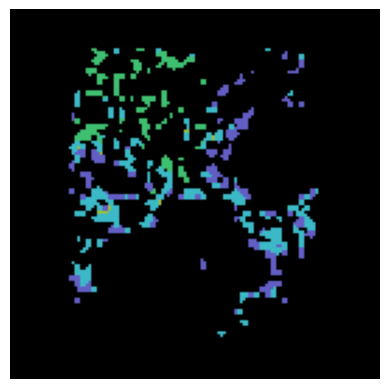

In [66]:
cmap = sns.color_palette('tab20') + sns.color_palette('tab20b')
mapping = {
    4: (98, 94, 196),
    6: (60, 185, 199),
    7: (63, 191, 112),
    8: (160, 189, 57),
}
cmap = {i:x if i not in mapping else np.asarray(mapping[i]) / 255.
        for i, x in enumerate(cmap)}



In [294]:

f = anndata.concat(sid_to_adata.values())


counts = Counter(f.obs['nbhd'])
f = f[np.asarray([True if counts[x] > 10 else False for x in f.obs['nbhd']])]

# get rid or ribosomal
f = f[:, [g for g in f.var.index.to_list() if g[:2] != 'RP']]

sc.pp.filter_genes(f, min_cells=10)

sc.pp.log1p(f)
sc.pp.scale(f)
sc.tl.rank_genes_groups(f, groupby='nbhd')

/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


... storing 'barcode' as categorical
... storing 'nbhd' as categorical
... storing 'annotation' as categorical
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/data/estorrs/miniconda3/envs/mushroom/li

In [295]:
for nbhd in sorted(set(f.obs['nbhd'])):
    print(nbhd, f.uns['rank_genes_groups']['names'][nbhd][:10])

nbhd 0 ['HP' 'APOA2' 'IGFBP7' 'APOA1' 'APOC1' 'APOC3' 'FGA' 'C3' 'APOC2' 'APOE']
nbhd 1 ['TMA7' 'GNAS' 'ACTG1' 'TMSB10' 'EEF1A1' 'ATP5F1E' 'B2M' 'TUBA1B' 'MYL6'
 'TIMP1']
nbhd 10 ['SNRPD1' 'H2AFZ' 'MRPL51' 'YBX3' 'FABP5' 'HNRNPA2B1' 'BCL2A1' 'ATP5F1A'
 'PRAME' 'FSCN1']
nbhd 11 ['PKM' 'GAPDH' 'TUBB' 'TXNL4A' 'EIF4A1' 'GSTP1' 'TUBA1B' 'FUS' 'MRPS21'
 'HSP90AB1']
nbhd 12 ['MRPL51' 'YBX3' 'S100A14' 'SNHG7' 'GSTP1' 'MARCO' 'H2AFZ' 'CD9' 'CD24'
 'PRDX2']
nbhd 13 ['YBX3' 'MRPL51' 'GSTP1' 'S100A14' 'CD24' 'ATP5F1A' 'H2AFZ' 'PRDX2'
 'MARCO' 'SNHG29']
nbhd 14 ['GSTP1' 'MRPL51' 'YBX3' 'H2AFZ' 'CD24' 'NARS' 'EEF1G' 'SNHG29' 'EEF2'
 'ATP5F1A']
nbhd 15 ['YBX3' 'CD9' 'SNHG29' 'CD24' 'GSTP1' 'MT-CO2' 'MRPL51' 'ATP5F1A'
 'S100A14' 'MARCO']
nbhd 16 ['GSTP1' 'TIMM13' 'ATP5F1A' 'H2AFZ' 'MARCO' 'PTMA' 'NME2' 'FSCN1' 'FABP5'
 'YBX3']
nbhd 17 ['HP' 'APOC1' 'APOC3' 'APOC2' 'SERPINA1' 'ALB' 'AMBP' 'APOA1' 'APOA2'
 'IGFBP7']
nbhd 18 ['TIMP1' 'IGFBP7' 'TMSB4X' 'APOC1' 'HP' 'APOC3' 'CST3' 'APOE' 'APOC2'
 'SERPINA

/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


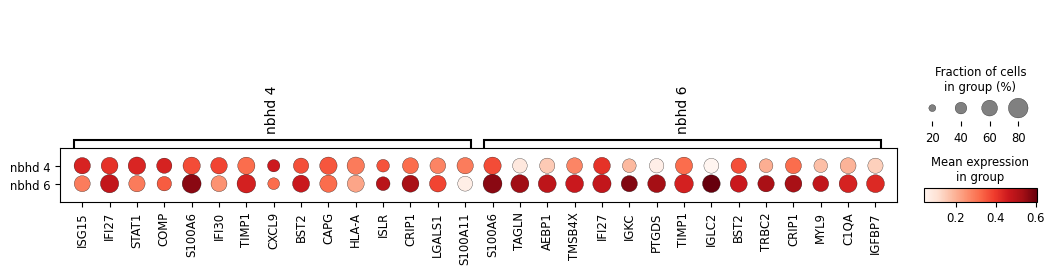

In [296]:
nbhds = [f'nbhd {x}' for x in [4,6]]
z = f[np.asarray([True if x in nbhds else False for x in f.obs['nbhd']])]

sc.pl.rank_genes_groups_dotplot(z, groupby='nbhd', n_genes=15, groups=nbhds,)


In [297]:
f.uns['rank_genes_groups']['names']['nbhd 4'][:10]

array(['ISG15', 'IFI27', 'STAT1', 'COMP', 'S100A6', 'IFI30', 'TIMP1',
       'CXCL9', 'BST2', 'CAPG'], dtype=object)

In [303]:
f.uns['rank_genes_groups'].keys()

dict_keys(['params', 'names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges'])

In [301]:
n = 50
nbhd4 = f.uns['rank_genes_groups']['names']['nbhd 4'][:n]
nbhd6 = f.uns['rank_genes_groups']['names']['nbhd 6'][:n]

common = set(nbhd4).intersection(nbhd6)
common

{'BST2',
 'CRIP1',
 'HLA-DQB1',
 'HLA-DRA',
 'HLA-DRB1',
 'IFI27',
 'ISLR',
 'LAPTM5',
 'LGALS1',
 'S100A6',
 'SPARC',
 'TIMP1',
 'TMSB4X'}

In [306]:
exp_df = pd.DataFrame(f.X, columns=f.var.index.to_list(), index=f.obs.index.to_list())
exp_df['nbhd'] = f.obs['nbhd']
exp_df = exp_df.groupby('nbhd').mean()
exp_df

AL627309.1  AL627309.5  LINC01409  LINC01128  LINC00115    FAM41C  \
nbhd                                                                         
nbhd 0     0.162447   -0.077285   0.041961   0.143781   0.020492 -0.089175   
nbhd 1     0.185180    0.074902  -0.030544  -0.045192  -0.029266 -0.089175   
nbhd 3    -0.049720   -0.077285   0.171027   0.167195   0.069272  0.061492   
nbhd 4     0.020499    0.013703  -0.059267  -0.035688   0.050578  0.089374   
nbhd 5     0.268531   -0.077285  -0.096457   0.009009   0.020492 -0.089175   
nbhd 6     0.016716   -0.025849  -0.075951  -0.018254  -0.050512 -0.014095   
nbhd 7    -0.001239   -0.045875  -0.171618  -0.090478  -0.097139 -0.061781   
nbhd 8    -0.049720   -0.077285  -0.127602  -0.062418   0.124983 -0.089175   
nbhd 9     0.005243   -0.006066  -0.151208  -0.043916  -0.054655 -0.089175   
nbhd 10    0.322574    0.405119   0.008009   0.183619   0.052753  0.121191   
nbhd 11   -0.049720    0.113517   0.131670   0.153666   0.123518  0.188173   
nbhd 12    0.006980   -0.028305   0.090912  -0.034418   0.016670 -0.025098   
nbhd 13    0.032335   -0.010653   0.087586   0.078400   0.036619  0.015303   
nbhd 14    0.075163    0.084534   0.118179   0.141668   0.091435  0.193088   
nbhd 15    0.008657    0.149645   0.150294   0.128641  -0.002478 -0.023203   
nbhd 16   -0.049720   -0.077285   0.140584   0.046125  -0.095873  0.189560   
nbhd 17    0.026464    0.021431  -0.002931   0.100916  -0.101274 -0.003080   
nbhd 18   -0.049720   -0.036179  -0.014118  -0.000294  -0.055868 -0.053325   
nbhd 20    0.018086   -0.033354  -0.034557   0.071219   0.012658 -0.012547   
nbhd 21   -0.049720   -0.077285  -0.084315   0.028226   0.119040 -0.089175   
nbhd 24    0.050187   -0.077285  -0.104517   0.089235  -0.071309 -0.089175   
nbhd 25   -0.049720   -0.077285  -0.115682  -0.065101  -0.060427 -0.089175   
nbhd 26   -0.049720    0.000192  -0.104846  -0.047597  -0.098104 -0.089175   
nbhd 27   -0.049720   -0.077285  -0.117849  -0.170048  -0.115951  0.012183   
nbhd 28   -0.049720   -0.077285   0.194222  -0.081719   0.124983 -0.089175   
nbhd 30   -0.049720   -0.077285   0.006190  -0.137713  -0.004057 -0.026538   
nbhd 31   -0.015356   -0.012342   0.022082  -0.013547   0.014978  0.019561   
nbhd 32   -0.026004   -0.008142  -0.032228  -0.043286   0.034924  0.004630   
nbhd 33   -0.004896    0.091151   0.079187   0.066442   0.001105 -0.008126   
nbhd 34   -0.049720   -0.077285   0.194222   0.276246  -0.169492 -0.089175   
nbhd 35   -0.049720   -0.077285  -0.095332   0.036771  -0.121610 -0.089175   
nbhd 36   -0.000667   -0.021669  -0.074411  -0.075185  -0.015135  0.018819   
nbhd 37   -0.049720   -0.077285  -0.175934  -0.167390  -0.040052 -0.089175   

         AL645608.6  LINC02593    SAMD11     NOC2L  ...    MT-CYB  BX004987.1  \
nbhd                                                ...                         
nbhd 0    -0.044897   0.339097  1.237270 -0.005948  ...  0.823243   -0.058004   
nbhd 1    -0.044897   0.040203  0.223734  0.253194  ...  0.593018    0.465852   
nbhd 3     0.256679   0.460728  0.678560 -0.003157  ...  0.893640   -0.058004   
nbhd 4    -0.005188  -0.056231 -0.091410  0.064809  ... -0.076638    0.002576   
nbhd 5    -0.044897   0.102237 -0.120908 -0.069087  ... -0.104178   -0.058004   
nbhd 6    -0.044897   0.067980  0.106743 -0.225493  ... -0.386345   -0.038899   
nbhd 7    -0.044897   0.200667  0.456096 -0.379828  ... -0.326942   -0.058004   
nbhd 8    -0.044897  -0.134622  0.217592 -0.126562  ... -0.035165   -0.058004   
nbhd 9    -0.044897   0.131268  0.489675 -0.362011  ... -0.243363   -0.010586   
nbhd 10   -0.044897   0.003918 -0.156390  0.271688  ...  0.174684   -0.058004   
nbhd 11    0.066131   0.032869  0.095029  0.446547  ...  0.264572   -0.058004   
nbhd 12    0.040607  -0.053143 -0.144349  0.050942  ...  0.041361    0.039829   
nbhd 13    0.071422  -0.074482 -0.141320  0.220293  ...  0.265758    0.043399   
nbhd 14    0.166969  -0.064914 -0.149428  0.392324  ...  0.5462

In [313]:
pool = sorted(set(nbhd4.tolist() + nbhd6.tolist()))
deltas = [[g, exp_df.loc['nbhd 4', g] - exp_df.loc['nbhd 6', g]] for g in pool]
deltas = pd.DataFrame(data=deltas, columns=['gene', 'delta']).set_index('gene')
deltas

delta
gene              
AEBP1    -0.337787
ATP6V0B   0.260880
BST2     -0.103566
C11orf96 -0.453672
C15orf48  0.260906
...            ...
TRBC2    -0.320752
TYMP      0.343582
TYROBP   -0.142724
WARS      0.226193
WFDC2     0.106321

[87 rows x 1 columns]

In [318]:
k = 10
top_common = deltas.loc[list(common)].abs().sort_values('delta').index.to_list()[:k]

specific = deltas[[True if x not in common else False for x in deltas.index.to_list()]]

top_nbhd4 = specific.sort_values('delta', ascending=False).index.to_list()[:k]
top_nbhd6 = specific.sort_values('delta', ascending=True).index.to_list()[:k]
top_common, top_nbhd4, top_nbhd6

(['IFI27',
  'LAPTM5',
  'HLA-DRA',
  'LGALS1',
  'BST2',
  'HLA-DQB1',
  'TIMP1',
  'HLA-DRB1',
  'ISLR',
  'SPARC'],
 ['HMGA1',
  'TYMP',
  'SSR4',
  'TPM3',
  'SMIM22',
  'RSAD2',
  'C15orf48',
  'ATP6V0B',
  'LGALS9',
  'S100A11'],
 ['IGLC2',
  'PTGDS',
  'CCL19',
  'TAGLN',
  'C11orf96',
  'IGHG1',
  'IGKC',
  'LUM',
  'COL6A2',
  'C1R'])

/data/estorrs/miniconda3/envs/mushroom/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


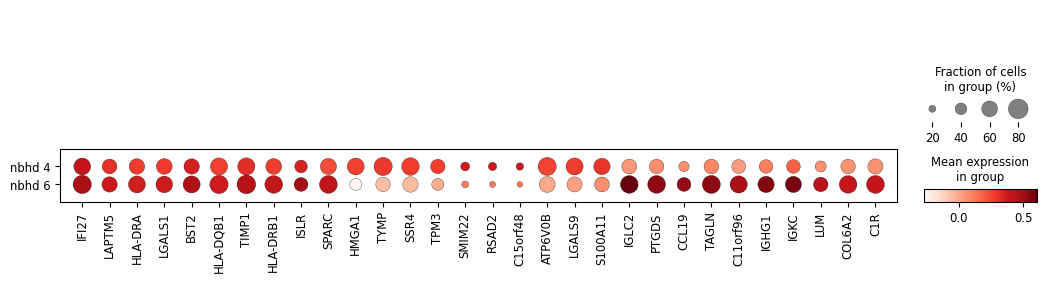

In [322]:
genes = top_common + top_nbhd4 + top_nbhd6
source = f[np.asarray([True if x in ['nbhd 4', 'nbhd 6'] else False for x in f.obs['nbhd']])]
sc.pl.dotplot(source, var_names=genes, groupby='nbhd', show=False)
plt.savefig('/data/estorrs/sandbox/subclone_dots.svg')

In [332]:
a = sid_to_adata[('HT268B1-U12', 'visium')].copy()
a.obs[a.obs['subclone']==''] = np.nan

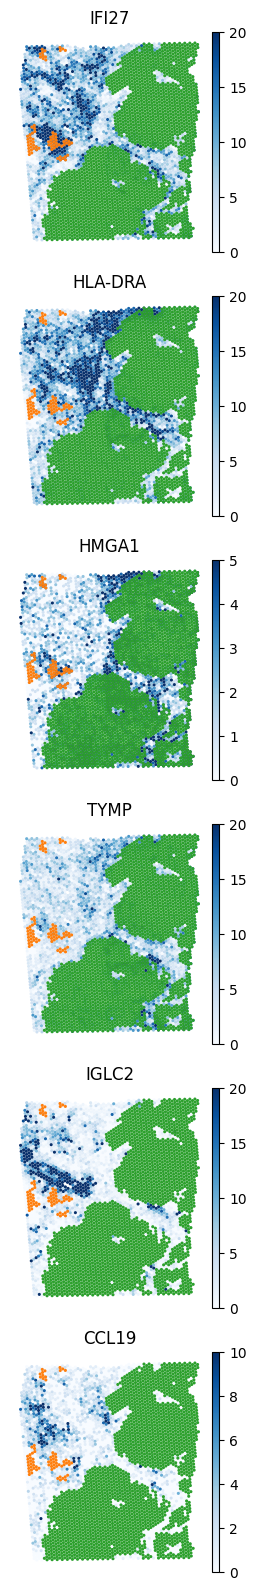

In [355]:
sc.settings._vector_friendly = True
mapping = {
    'IFI27': 20,
    'HLA-DRA': 20,
    'HMGA1': 5,
    'TYMP': 20,
    'IGLC2': 20,
    'CCL19': 10,
    
}

fig, axs = plt.subplots(nrows=len(mapping), figsize=(4, 20))
for i, (gene, vmax) in enumerate(mapping.items()):
    ax = axs[i]
    sc.pl.spatial(a, color=gene, ncols=2, alpha_img=0, size=1.5, vmax=vmax, cmap='Blues', ax=ax, return_fig=False, show=False)
    sc.pl.spatial(a, color='subclone', alpha_img=0, size=1.5, ax=ax, return_fig=False, show=False, legend_loc=None)
    ax.set_title(gene)
    ax.invert_yaxis()
    ax.axis('off')
plt.savefig('/data/estorrs/sandbox/subclone_ht268_exp.svg', dpi=300)

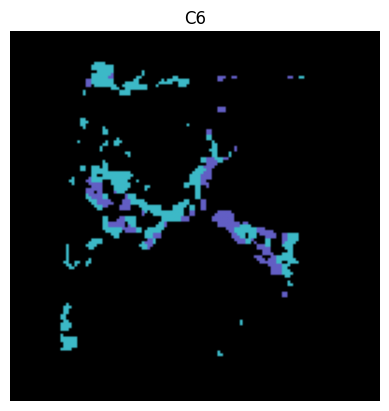

In [345]:

rgb = get_nbhd_rgb(volume[12], [4,6], cmap=cmap)
plt.imshow(rgb)
plt.axis('off')
plt.title(m_nbhd)
plt.show()